In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

Some Data Description  which is related to determining how bad the cancer type is 
 
diagnosis --> Qualitative -->	The diagnosis contains 2 types malignant ( bad cancer cancerous type) denoted by M and begin denoted by B ( good cancer non cancerous type) . 
radius_mean --> Quantitative --> Radius is the mean of distances from the center of the tumor to points on the perimeter and is measured in mile meter.
texture_mean -->	Quantitative --> Texture is the standard deviation of gray-scale values. 
In the breast cancer diagnosis, there is a scale from 1 to 5 to determine whether the tumor is benign or Malignant. According to the cancer diagnosis specialists, score 1 implies benign, score 2 implies a probable benign. score 2 (probably benign), score 3 (benign or malignant are equivocal), score 4 (malignancy suspected), and score 5 (malignancy strongly suggested).  
Perimeter_worst  -->	Quantitative --> Perimeter is the tumor’s perimeter and is measured in mile meters.
area_worst --> Quantitative	--> Area is the tumor’s area and is measured in mile meters ^2.
Smoothness_worst	Quantitative	Smoothness is the local variation in the radius lengths and is measured in terms of mile meters .
Compactness_worst --> Quantitative	--> Compactness is (perimeter^2 / area - 1.0).
Concavity_worst --> Quantitative --->	Concavity is severity of concave portions of the contour.
Concave points_ worst -->	Quantitative --> Number of concave portions of the contour .
Symmetry_worst -->	Quantitative -->	In cancer, there are 3 categories of symmetry breaking examined for cancer feature such as combinatorial, geometric, and functional(5).
Fractal_dimension_worst -->	Quantitative -->	Fractal  dimension is the ("coastline approximation" – 1) .



## The following picture shows the scale of cancer diagnosis which runs from 1 to 5 

![](Cancer.png)

In [2]:
df = pd.read_csv("breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.isnull().sum()
# so all columns data are non missing 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df[df.duplicated(['id'])] # so it seems there are no duplicates in this data set to be dropped 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [7]:
df.drop(["id"], axis = 1, inplace = True) # so here I am dropping the column id since it is not useful in 
# the analysis 

In [8]:
for col in df.columns: 
    print(f"for column {col}\n-----------\n")
    print(df[col].value_counts())
    print("\n")
    
# after observing the number of M ( malignant ) cancer and the B (begin) cancer 

for column diagnosis
-----------

B    357
M    212
Name: diagnosis, dtype: int64


for column radius_mean
-----------

12.34    4
12.77    3
15.46    3
12.89    3
13.05    3
        ..
12.31    1
18.81    1
13.30    1
23.09    1
18.25    1
Name: radius_mean, Length: 456, dtype: int64


for column texture_mean
-----------

14.93    3
15.70    3
18.90    3
16.84    3
17.46    3
        ..
20.53    1
17.66    1
24.80    1
20.56    1
10.94    1
Name: texture_mean, Length: 479, dtype: int64


for column perimeter_mean
-----------

82.61     3
134.70    3
87.76     3
130.00    2
58.79     2
         ..
70.21     1
68.69     1
95.55     1
102.90    1
88.52     1
Name: perimeter_mean, Length: 522, dtype: int64


for column area_mean
-----------

512.2     3
1214.0    2
399.8     2
758.6     2
1075.0    2
         ..
704.4     1
904.6     1
646.1     1
300.2     1
1001.0    1
Name: area_mean, Length: 539, dtype: int64


for column smoothness_mean
-----------

0.10070    5
0.10750    4
0.10540 

## Data Visualization 

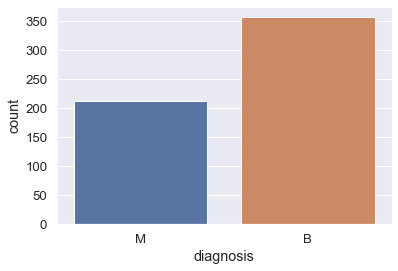

In [9]:
sns.countplot(x="diagnosis", data=df)

In [10]:
df.isnull().sum()
# so all columns data are non missing 

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
sns.set(rc={'figure.figsize': [12, 12]}, font_scale=1.2)

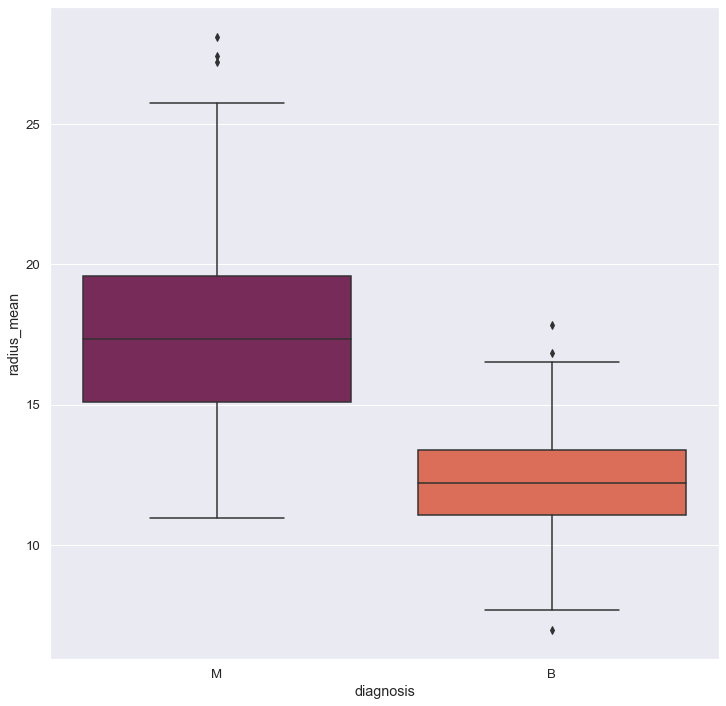

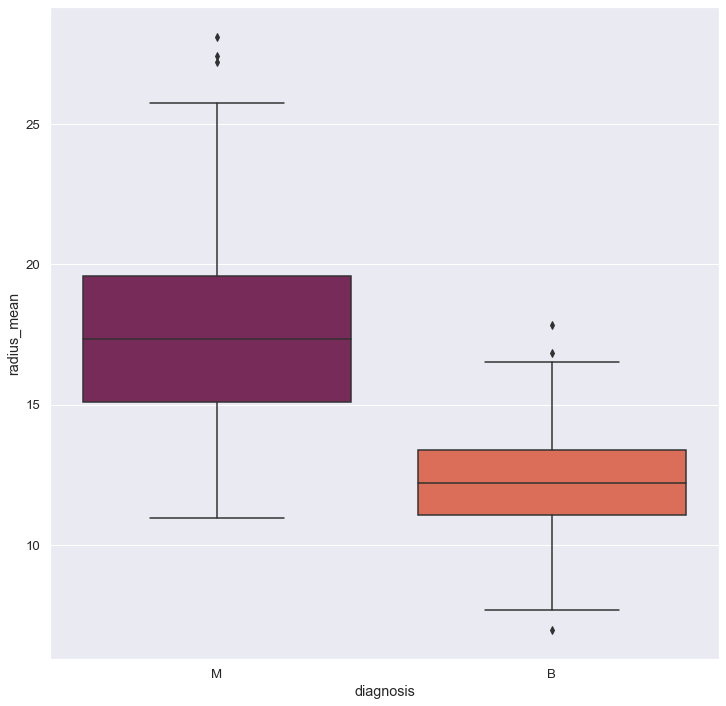

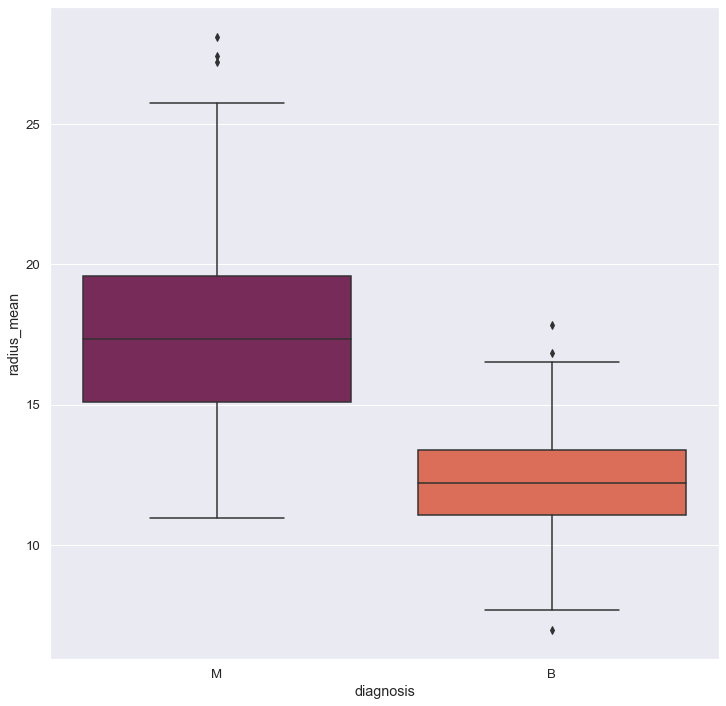

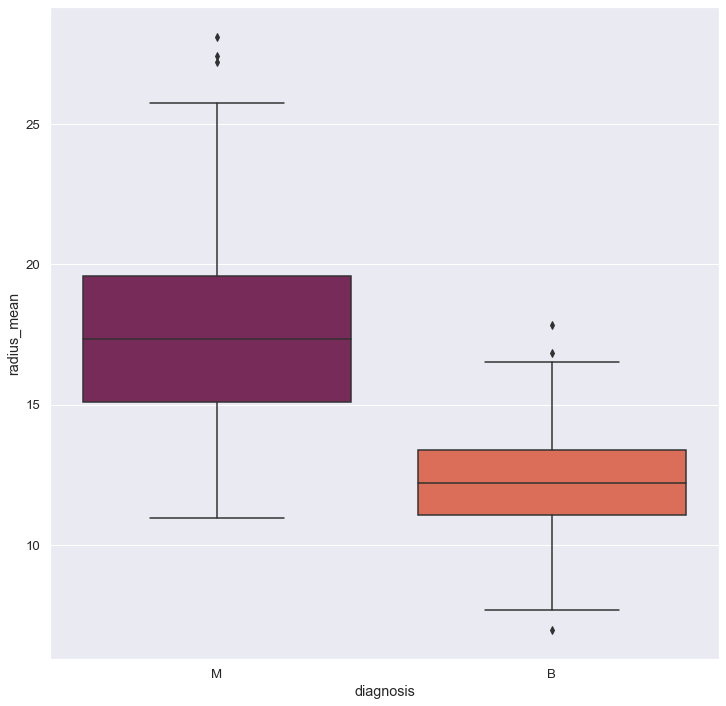

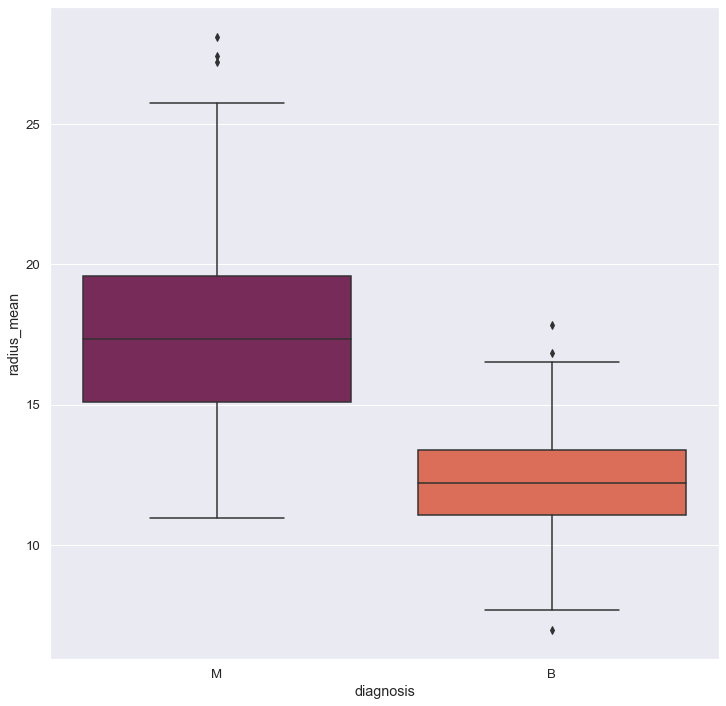

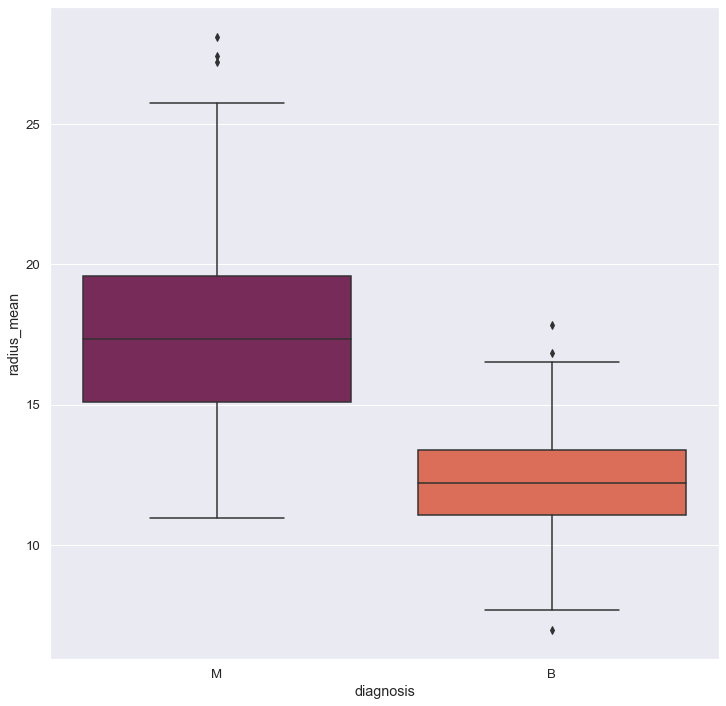

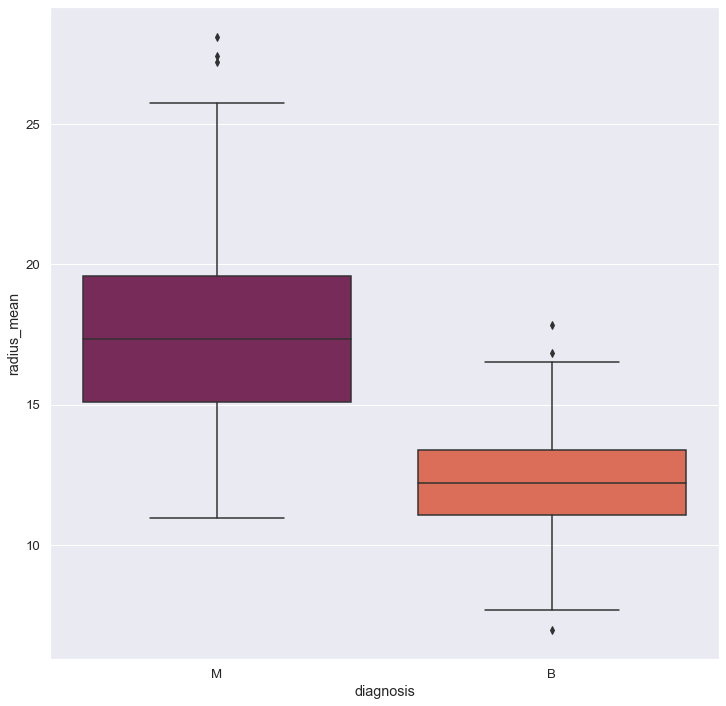

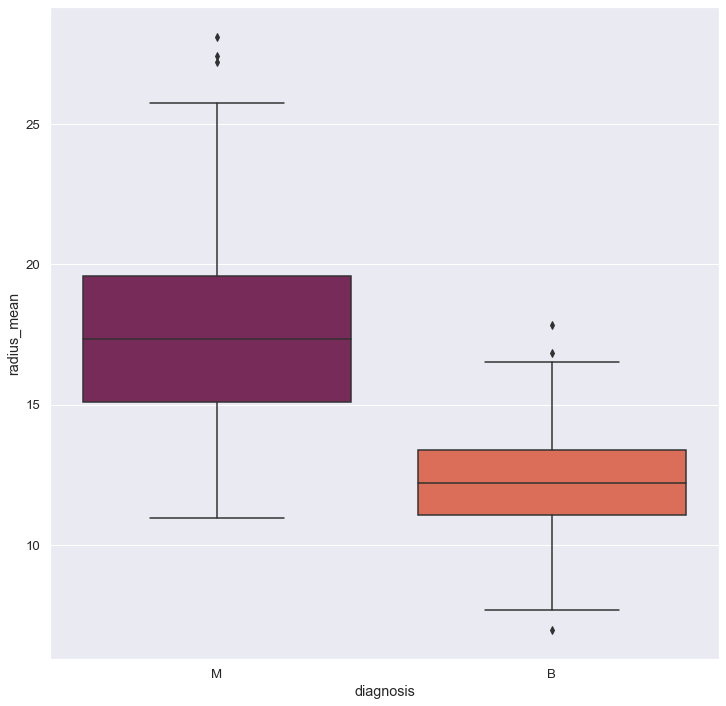

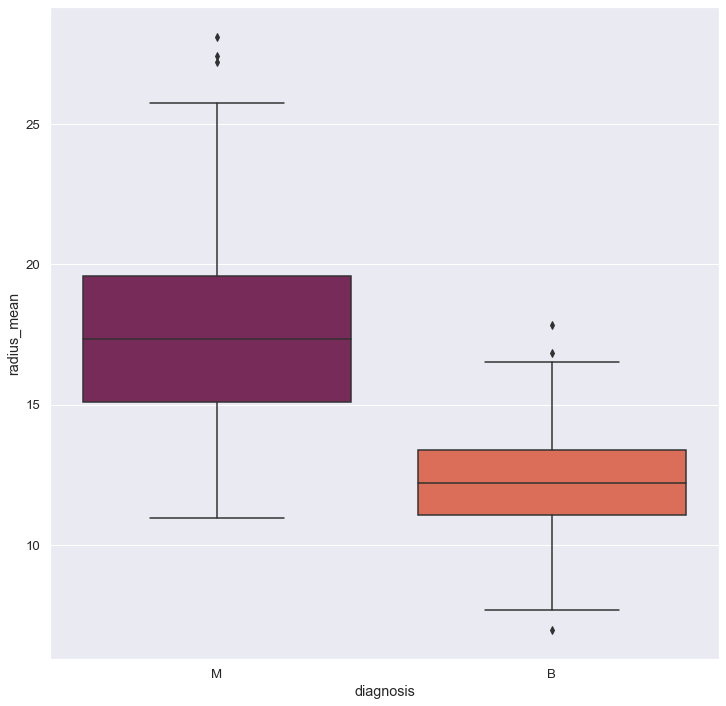

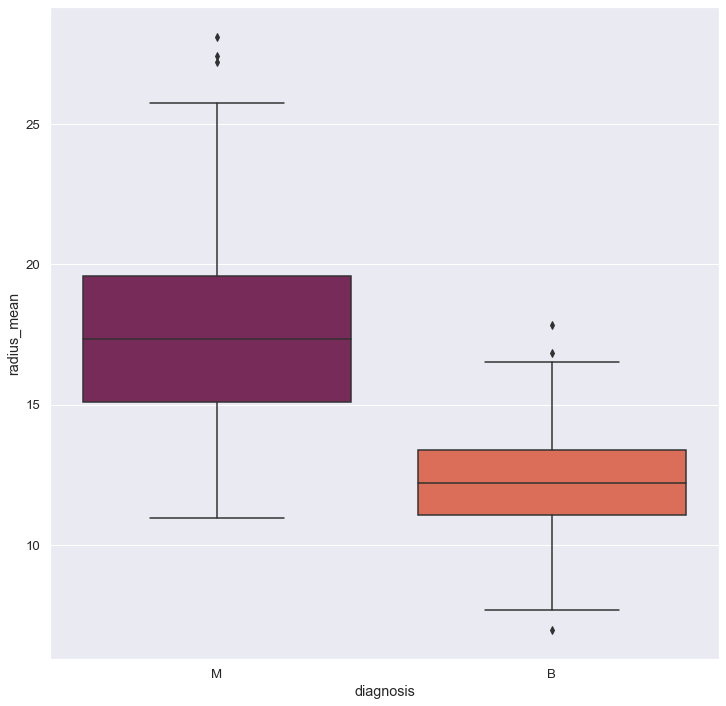

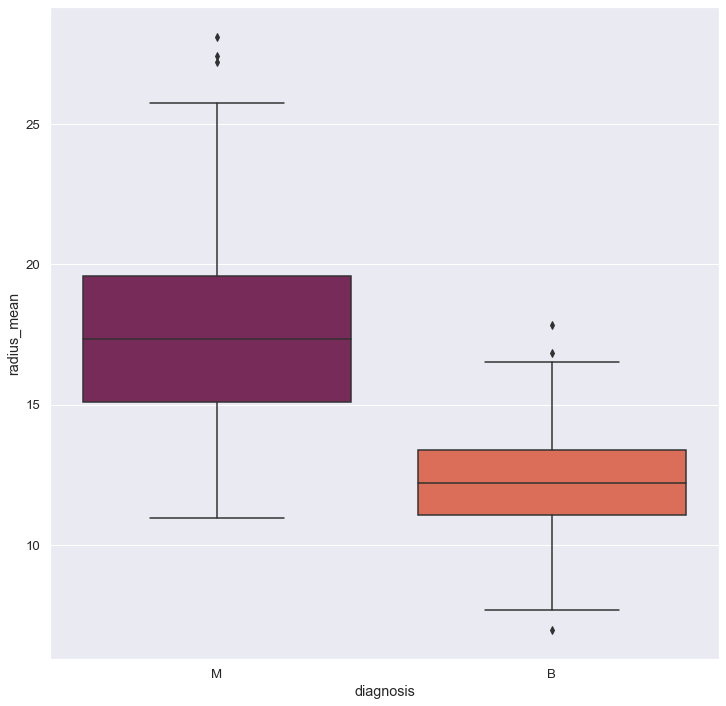

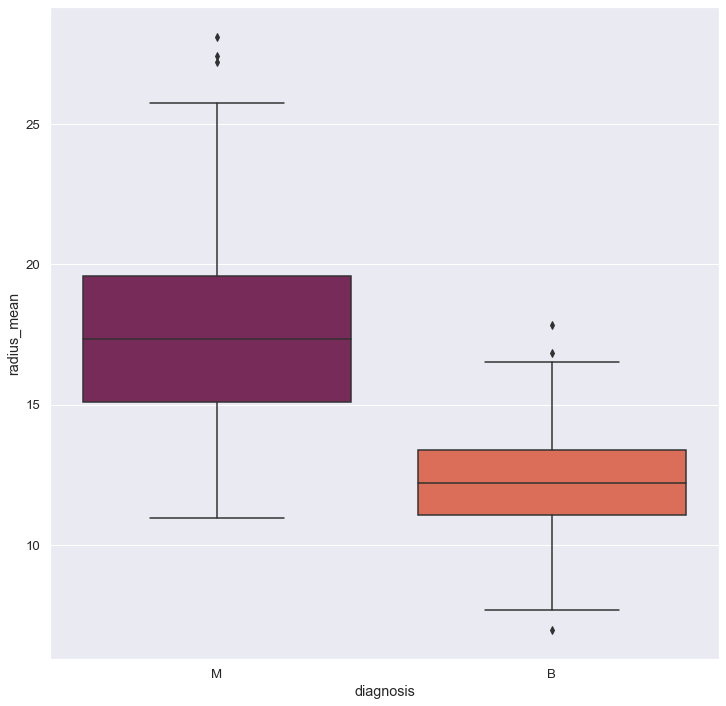

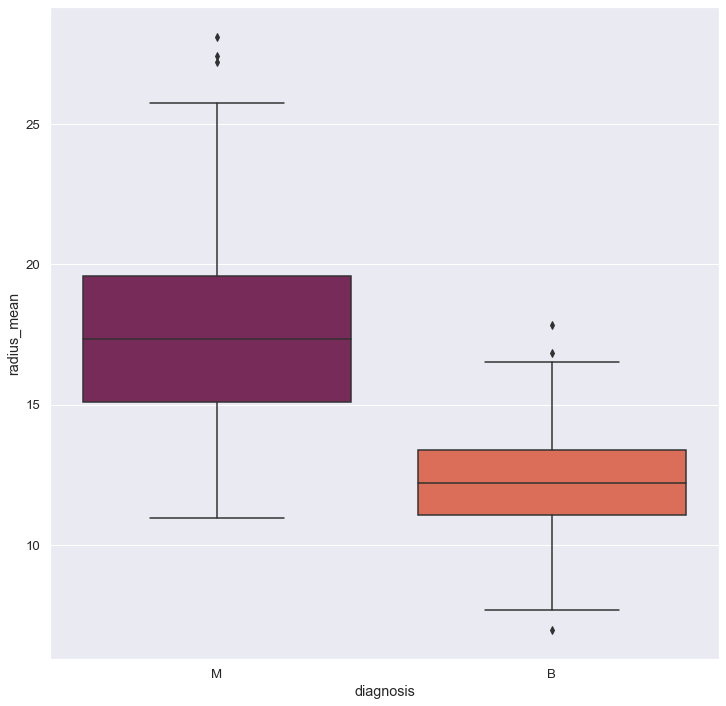

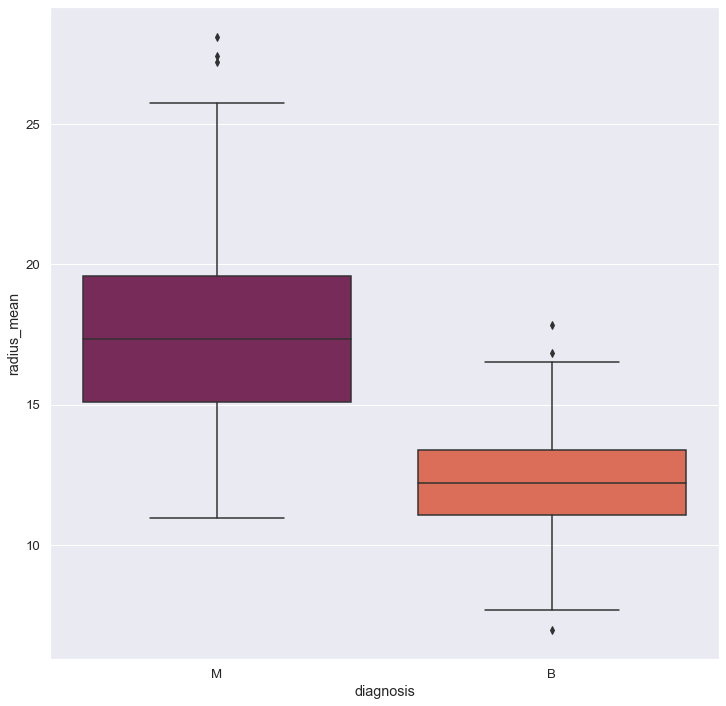

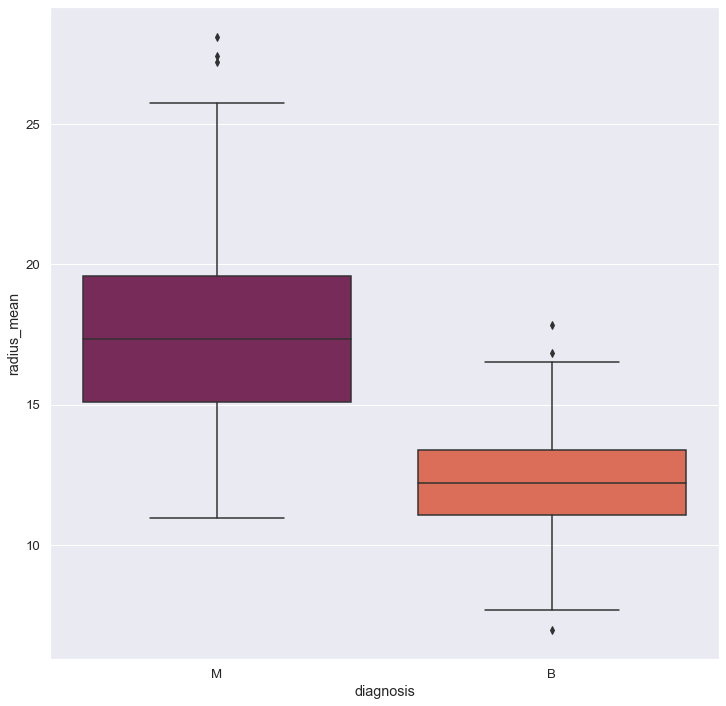

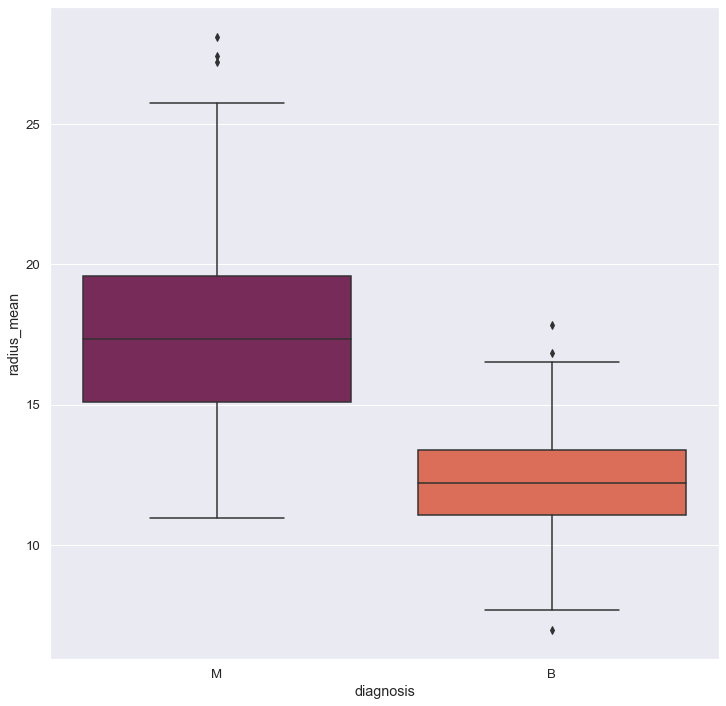

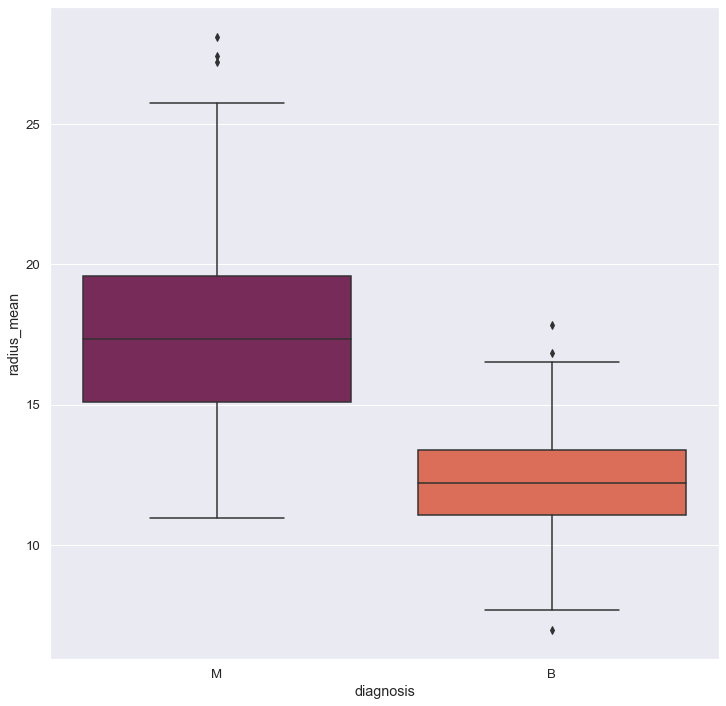

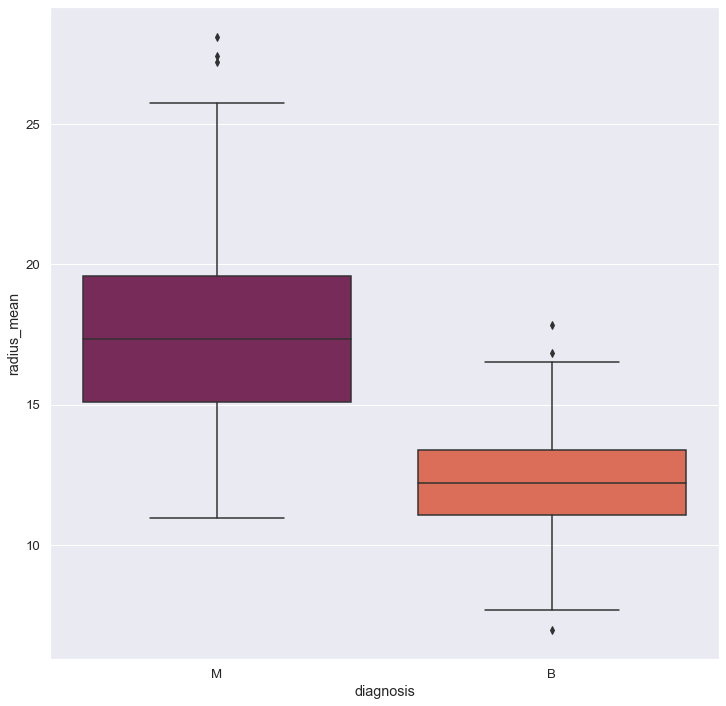

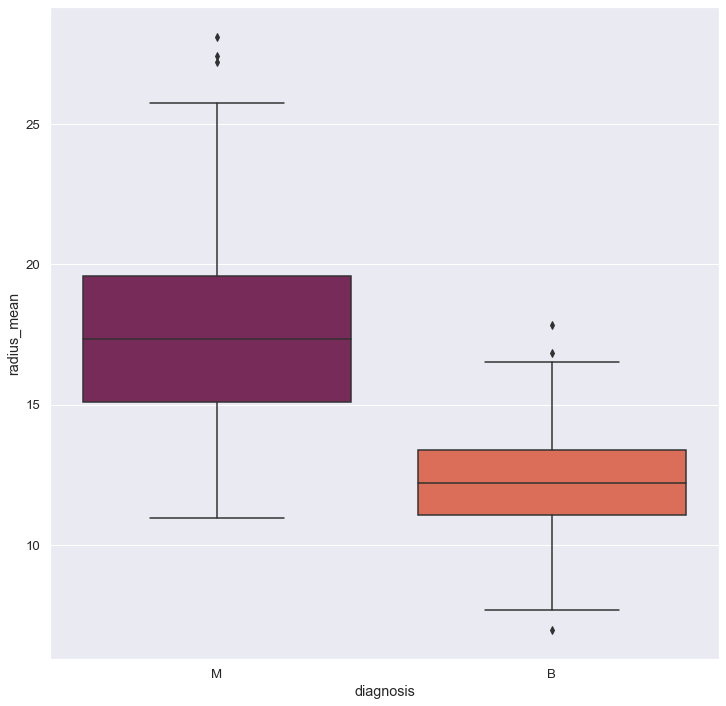

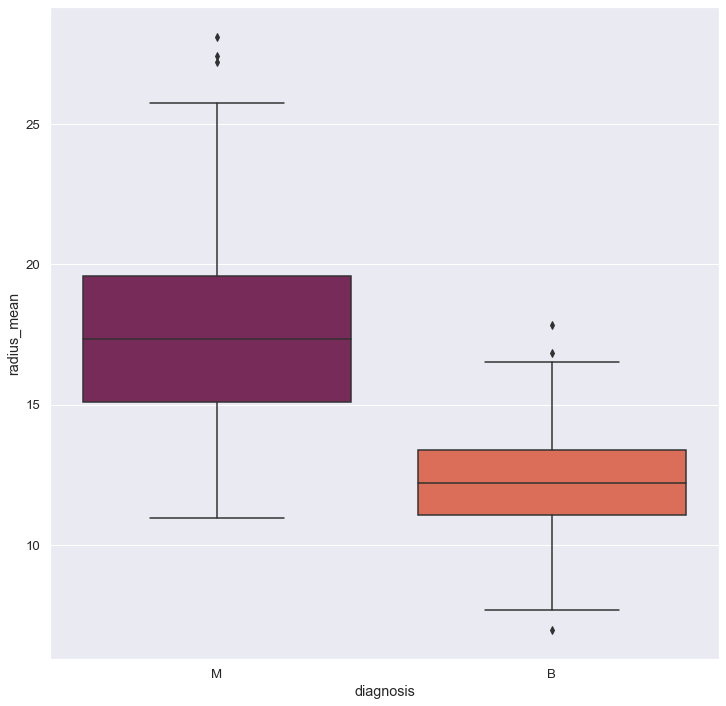

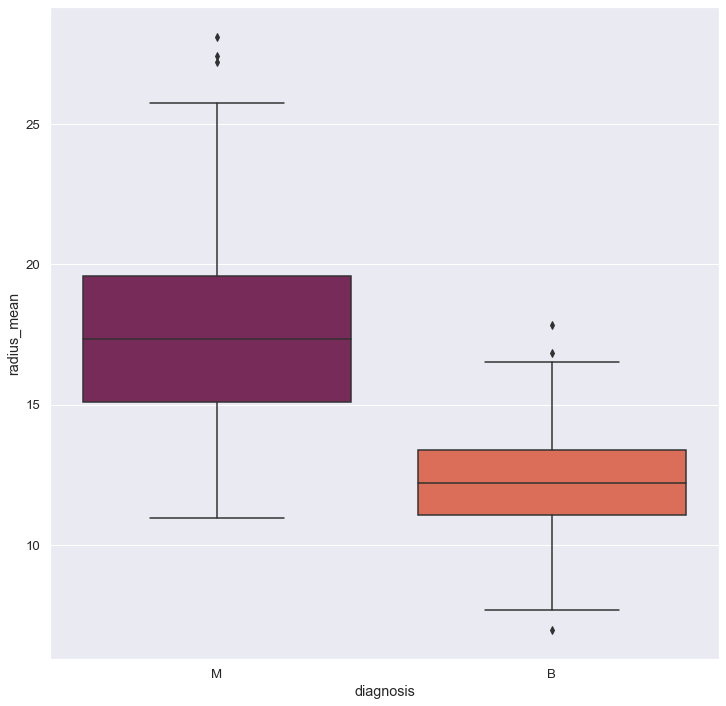

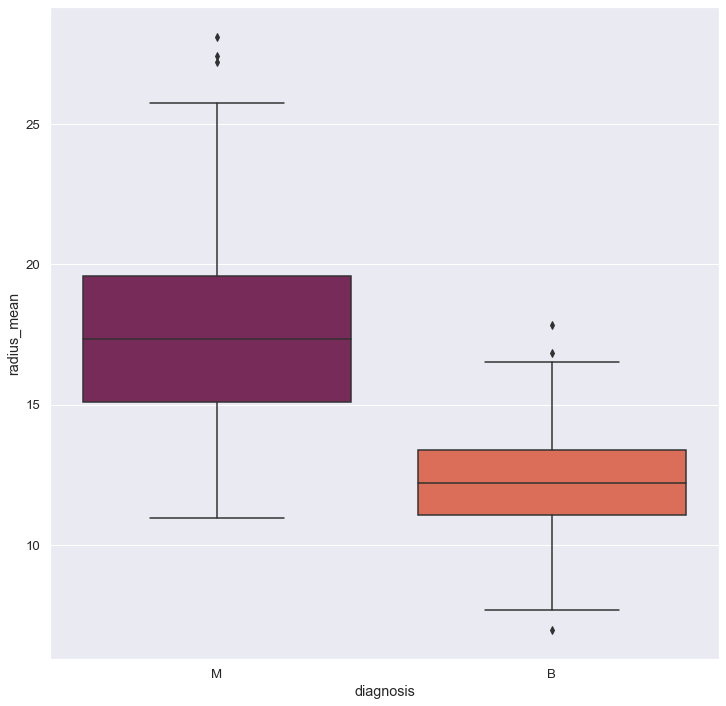

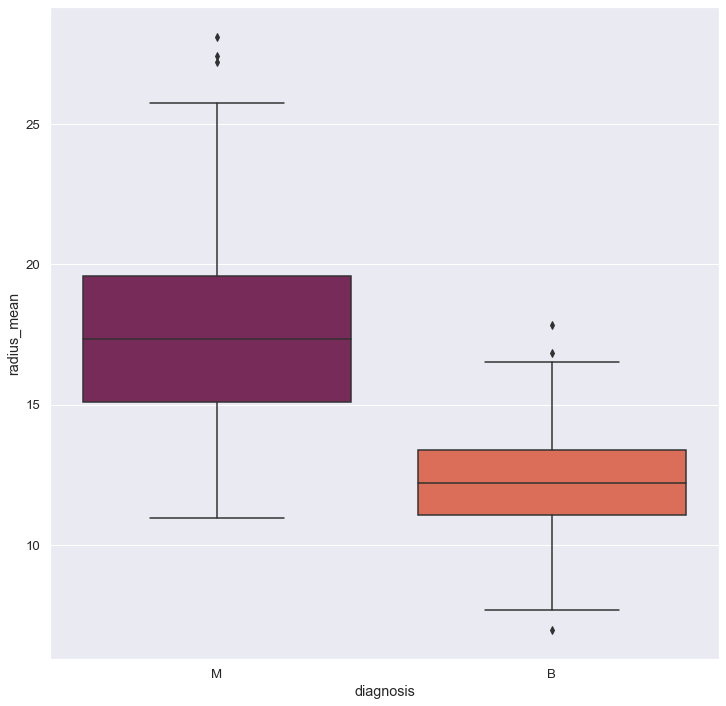

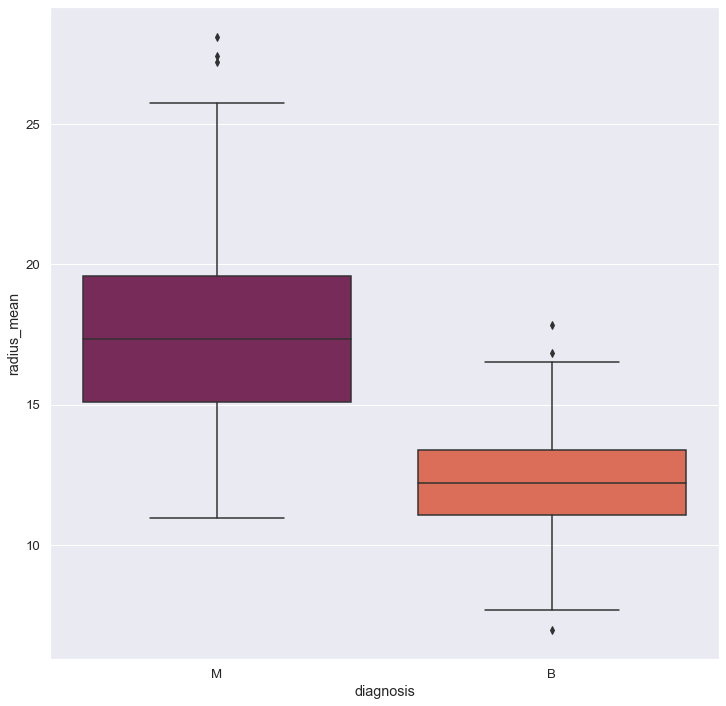

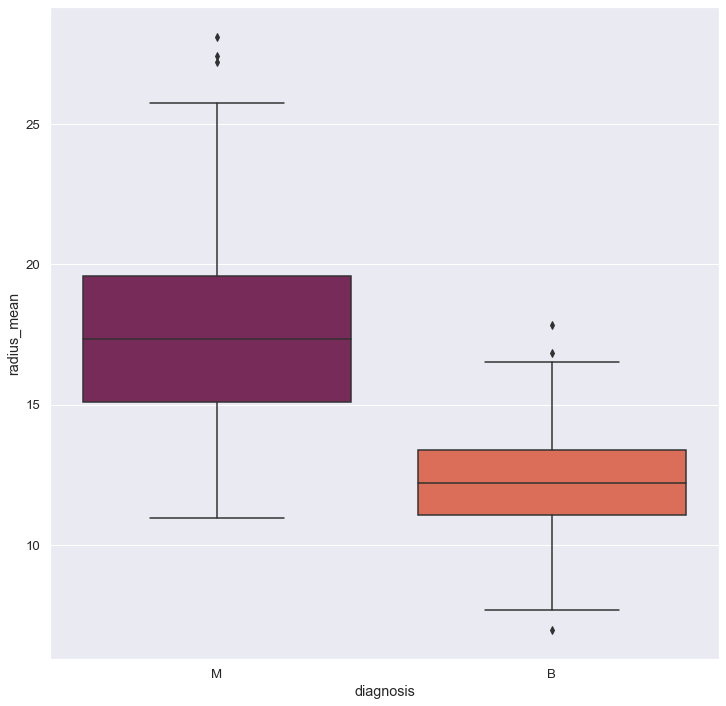

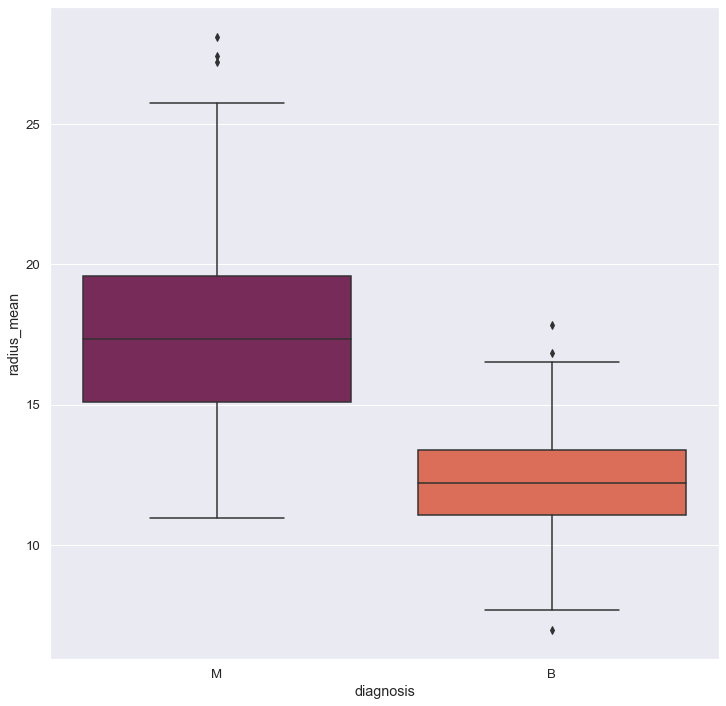

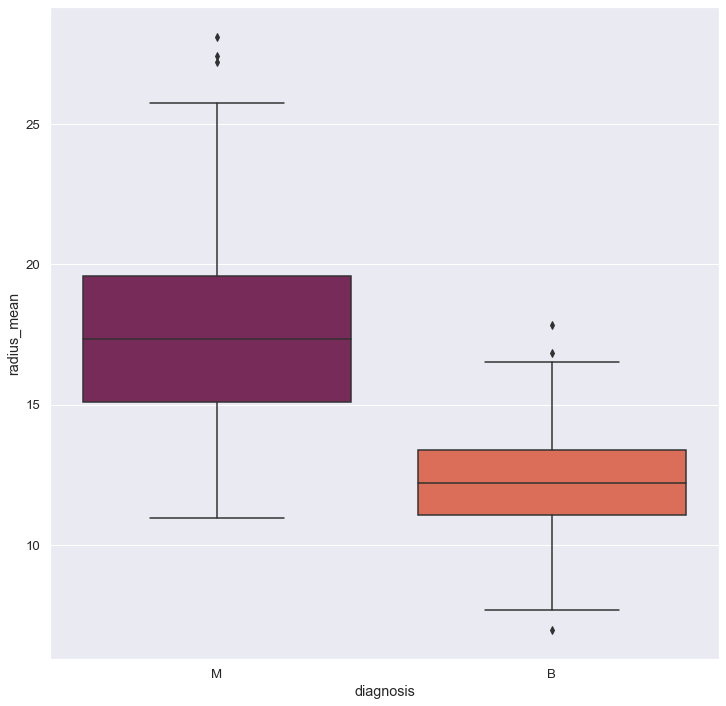

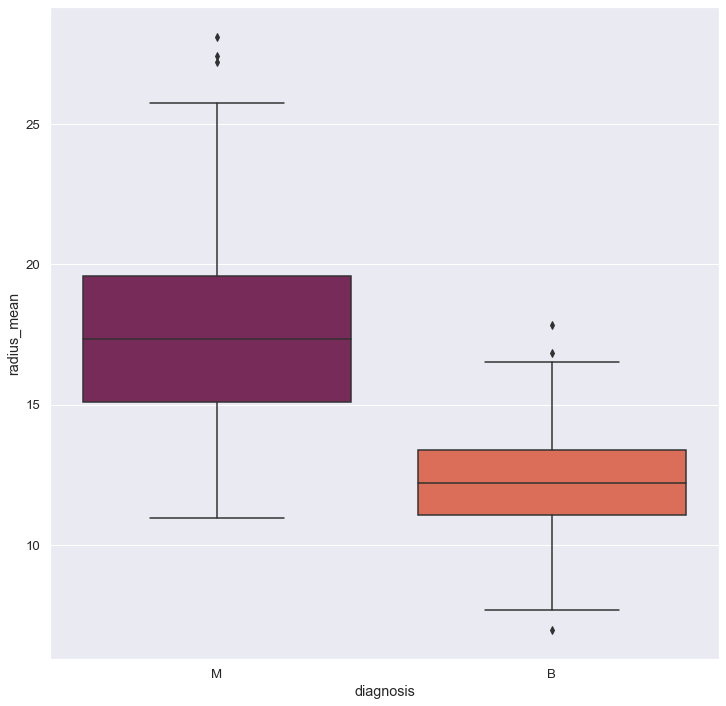

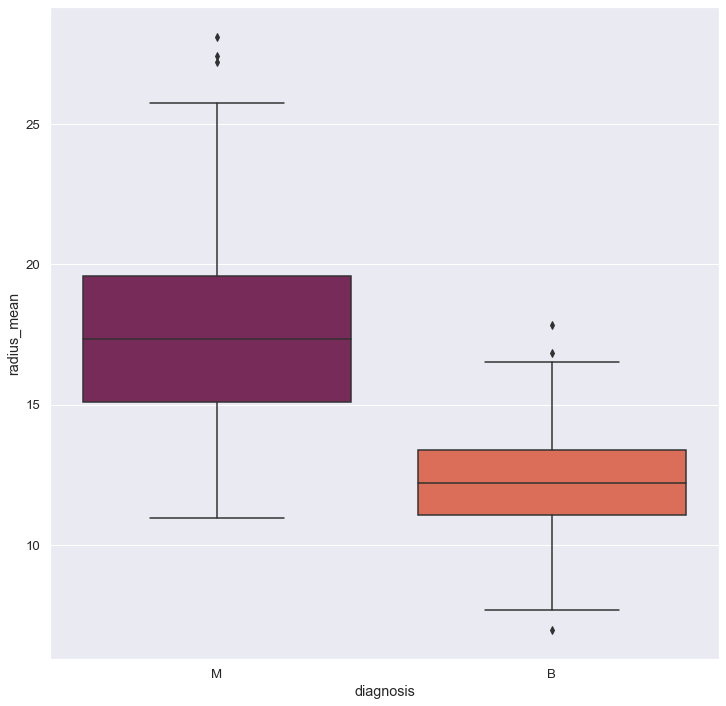

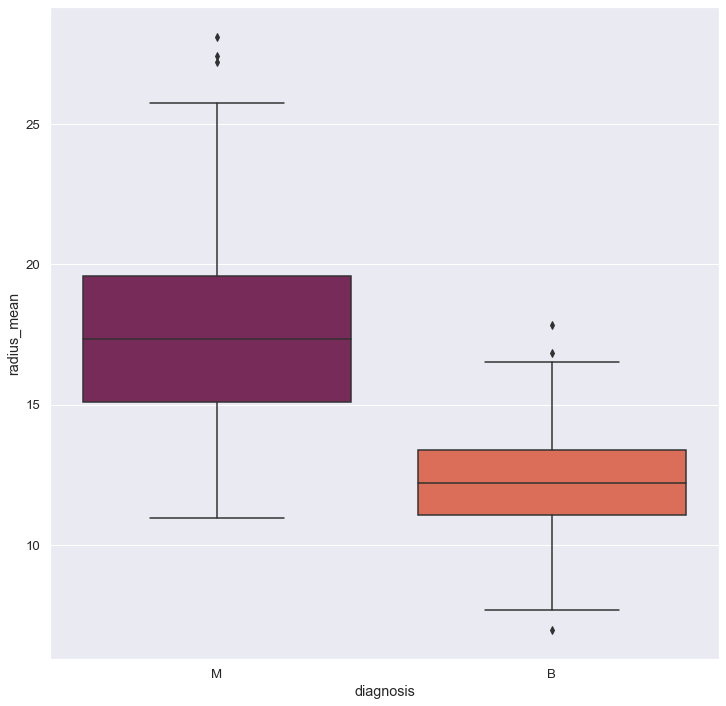

In [12]:
list1 = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
         "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", 
        "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", 
        "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst","smoothness_worst", 
        "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

for x in list1: 
    sns.boxplot(x="diagnosis", y="radius_mean",palette="rocket",data=df)
    plt.show()

# so after examining the boxplots of every quantitative variables across the malignant and begin cancer types,
# there seems outliers that should be handeled 

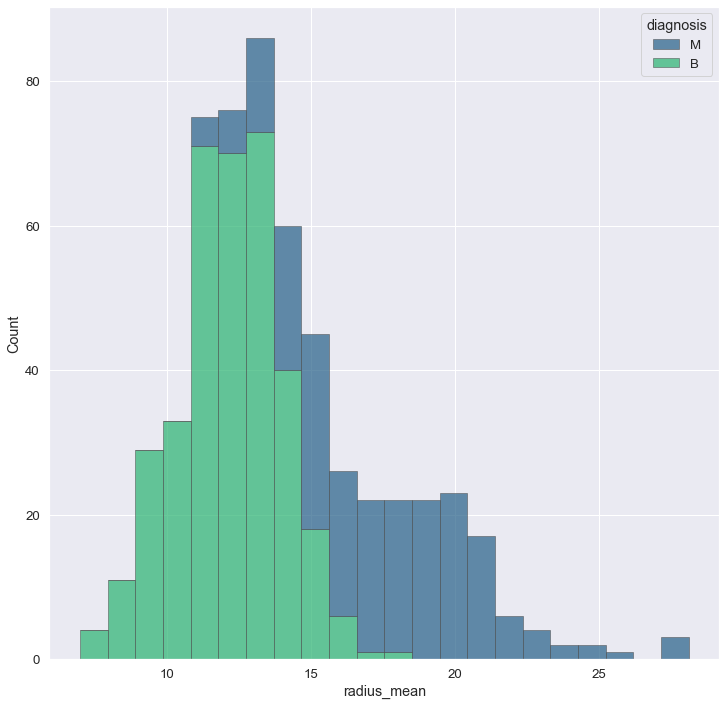

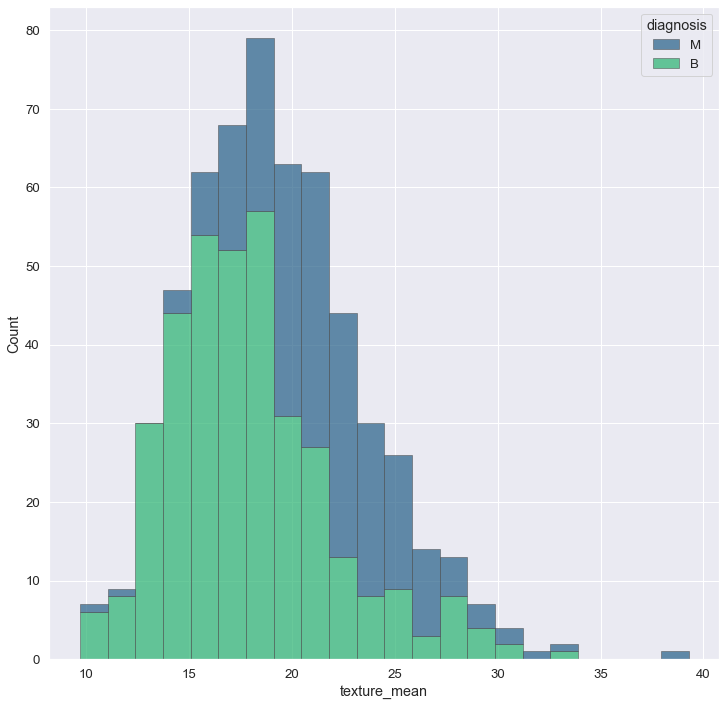

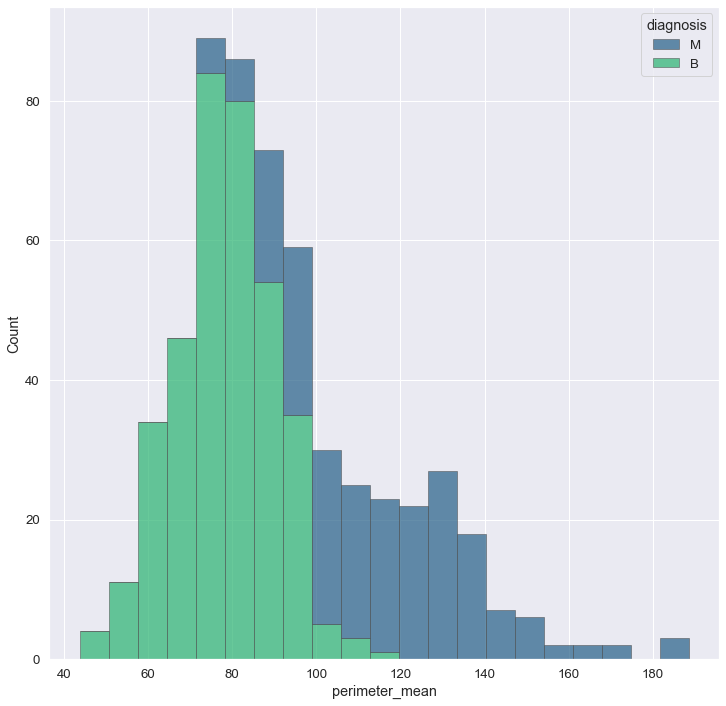

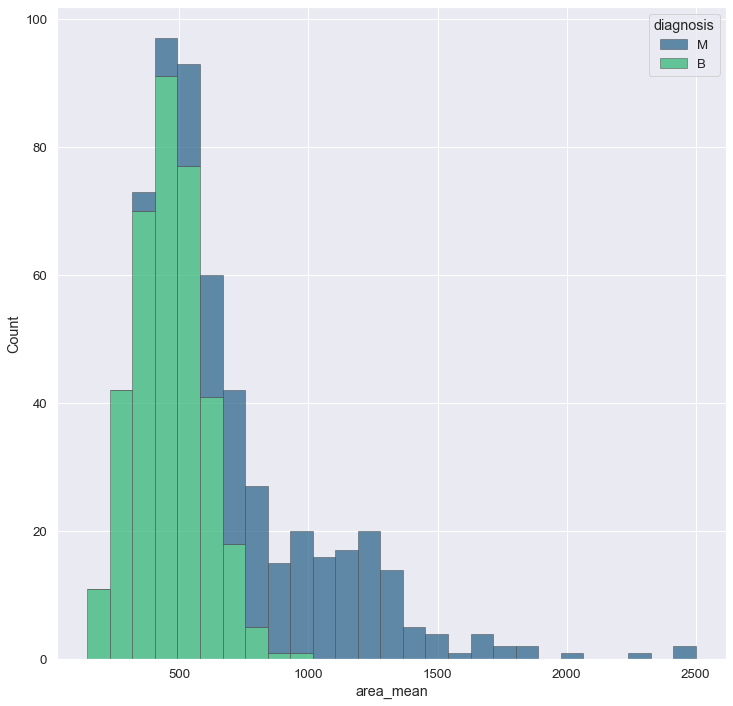

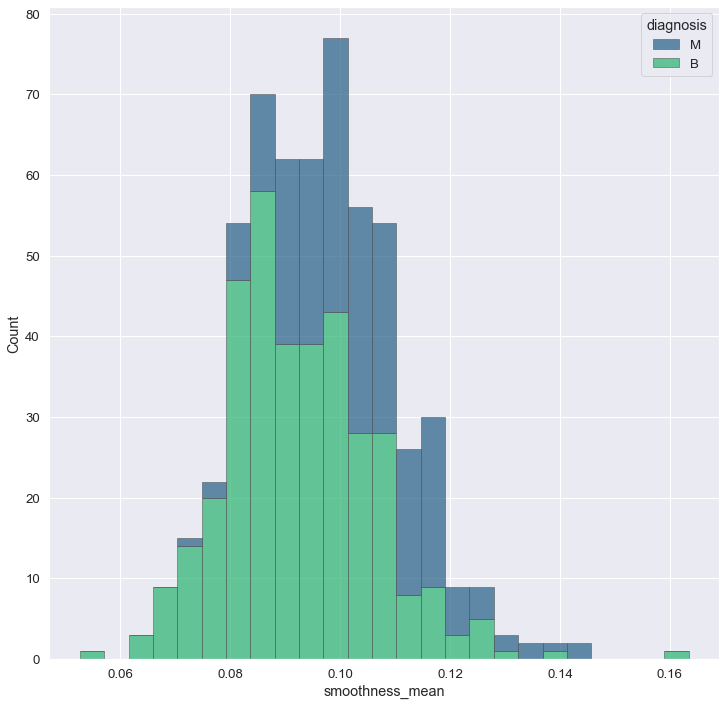

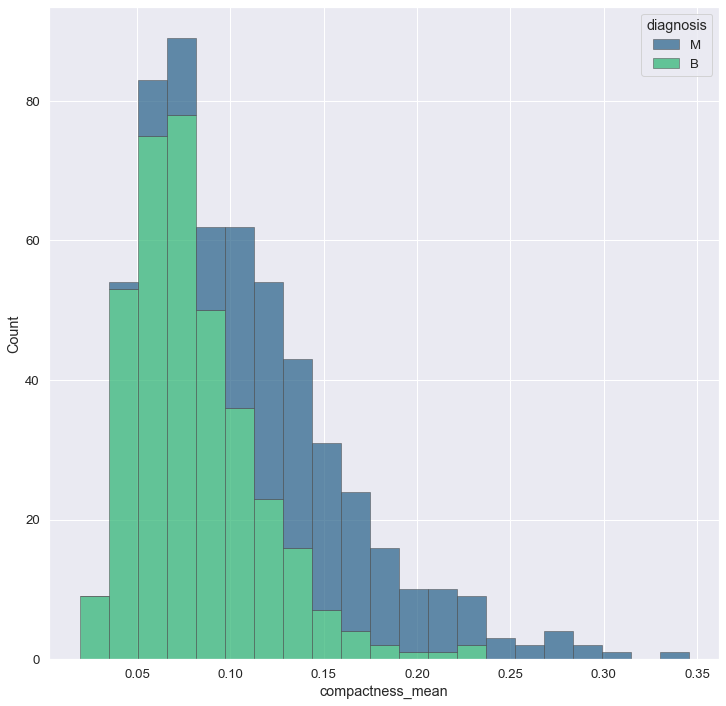

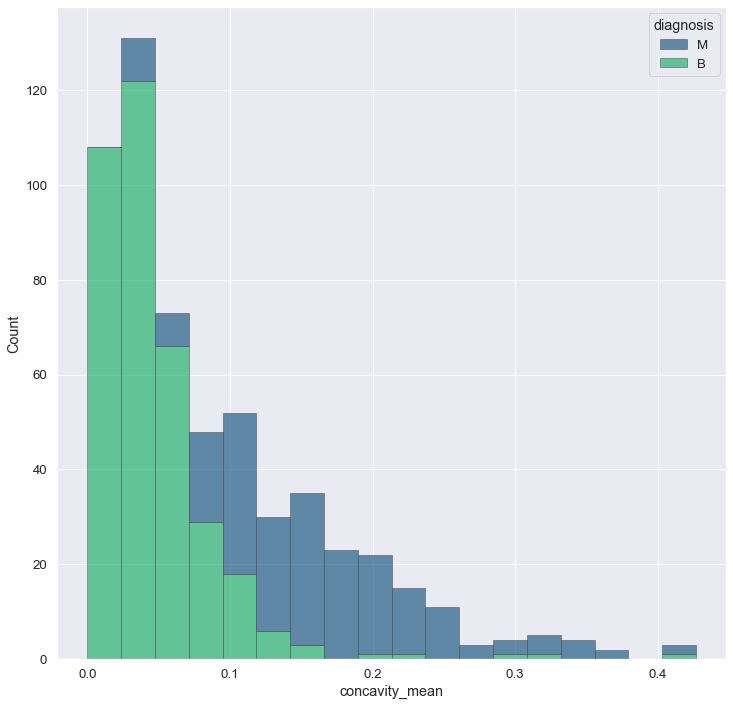

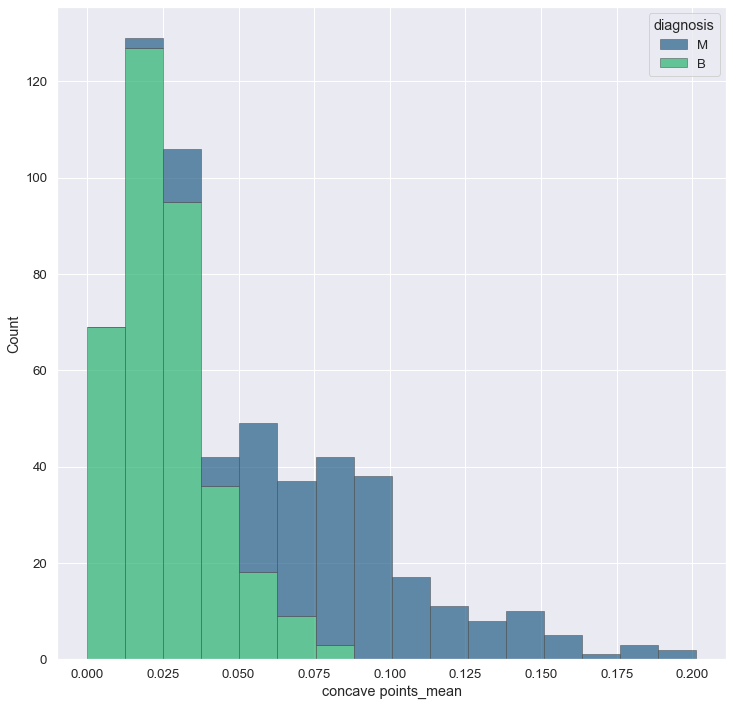

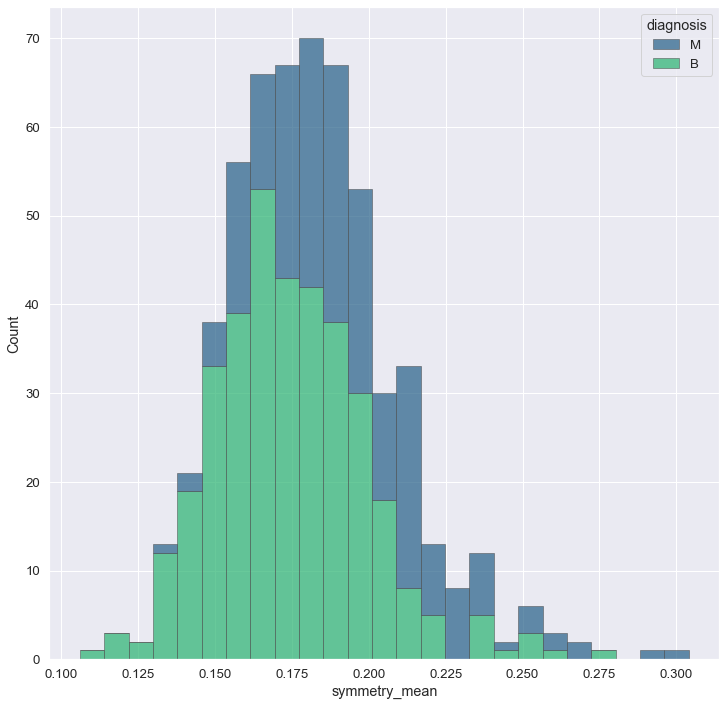

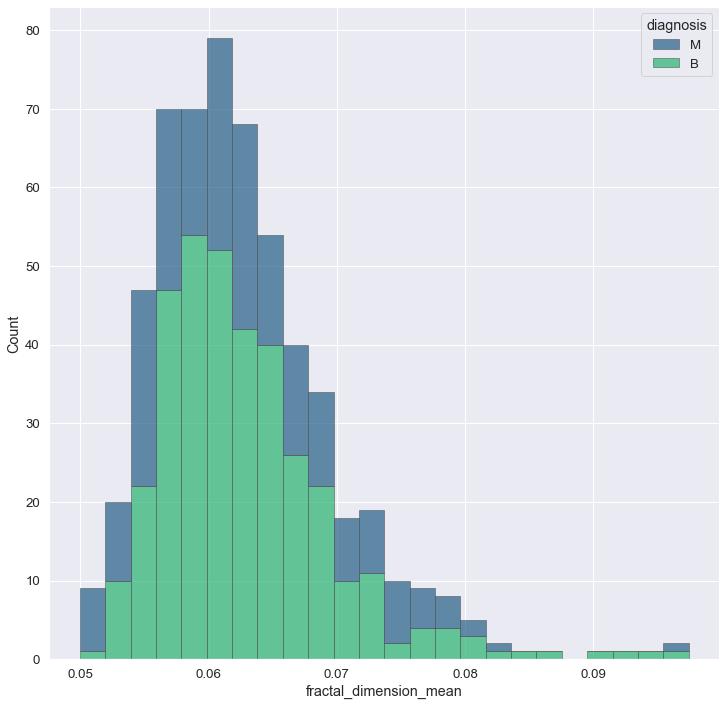

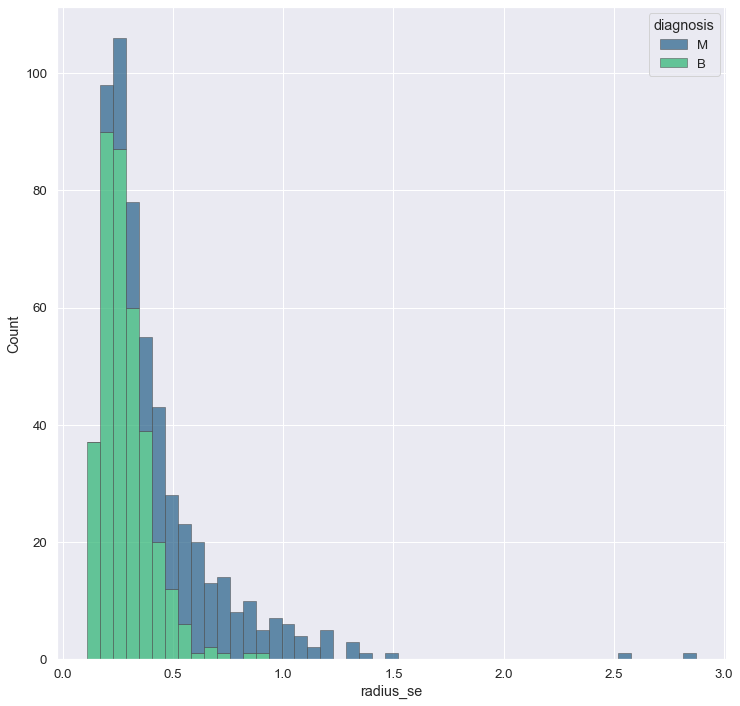

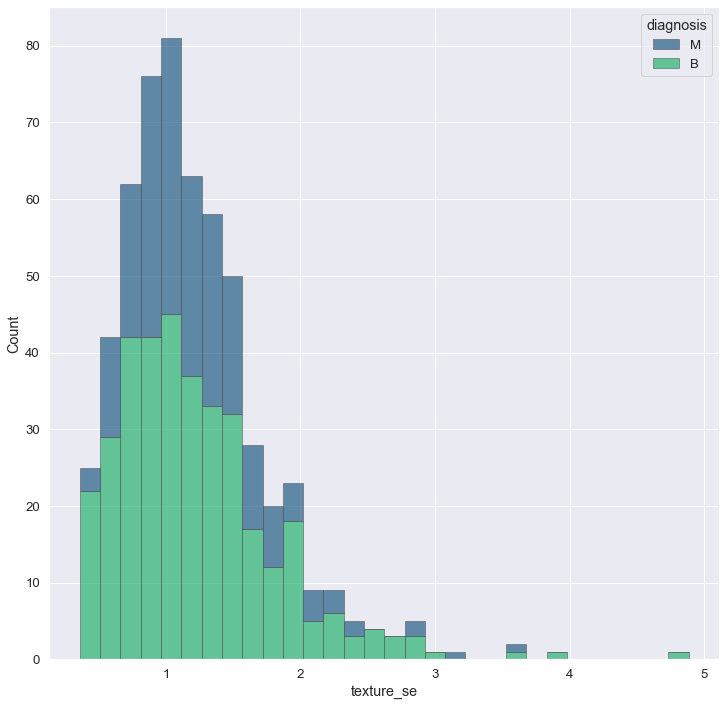

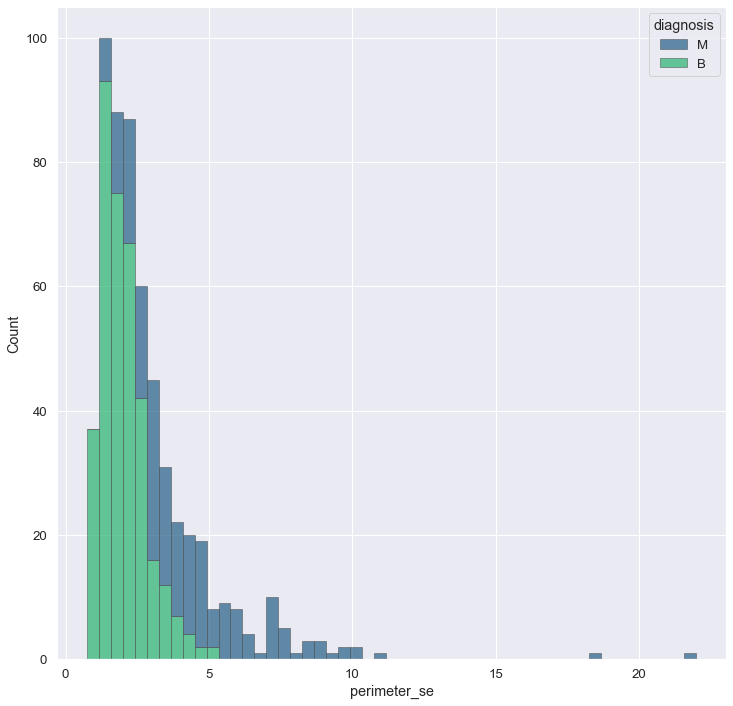

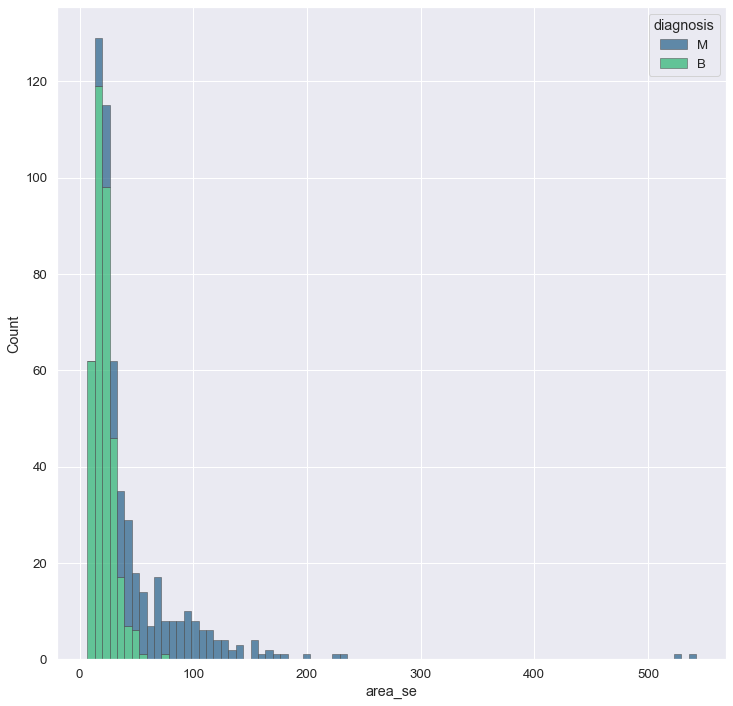

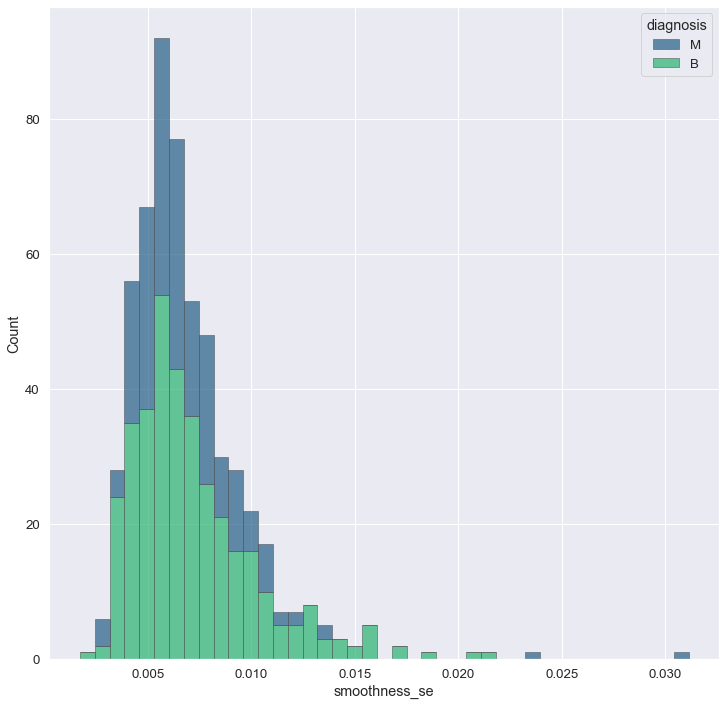

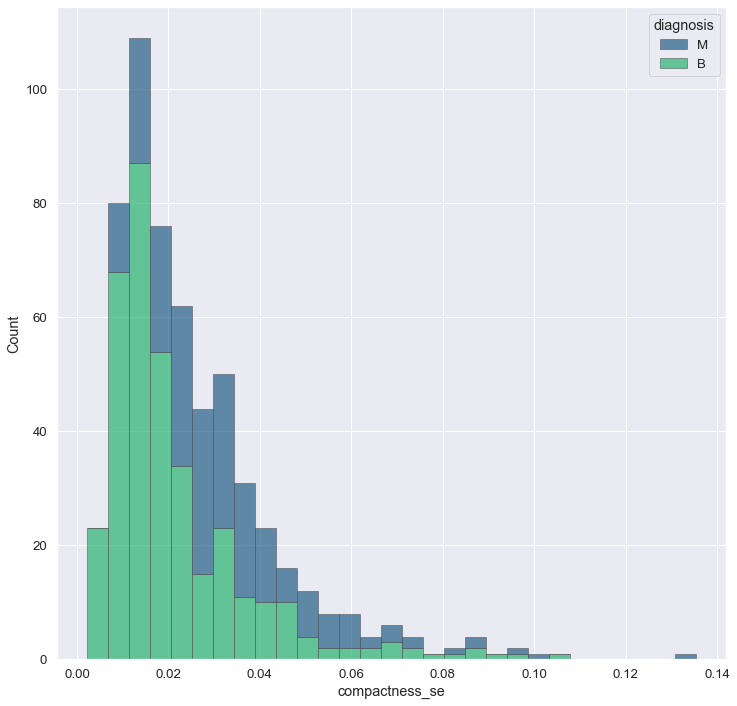

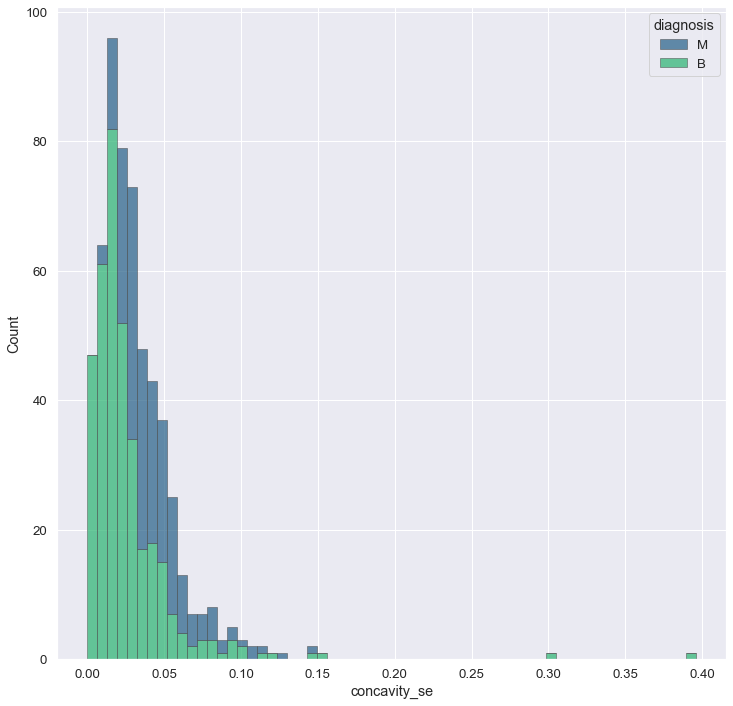

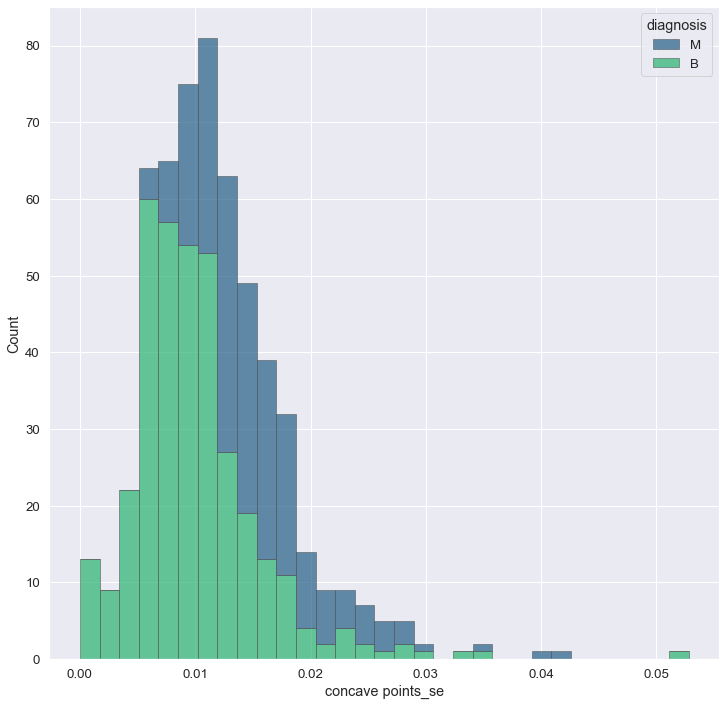

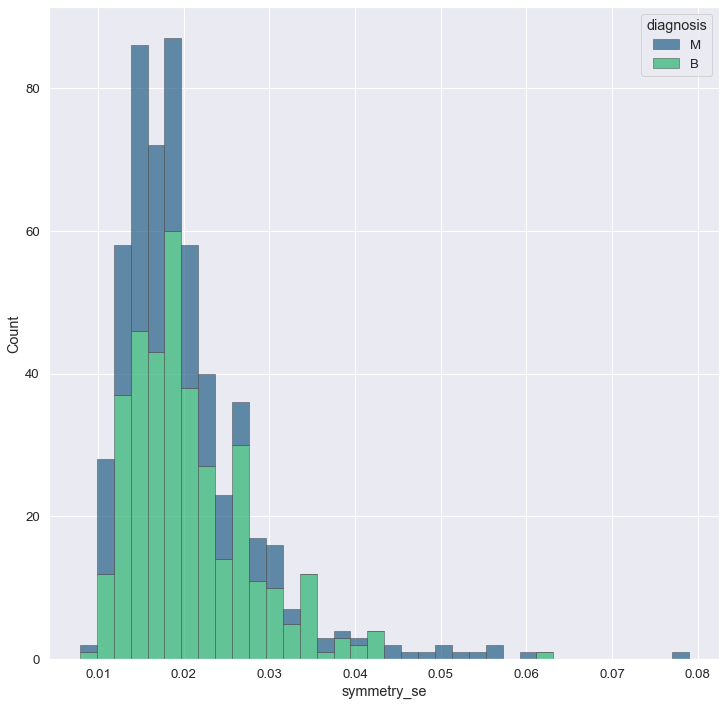

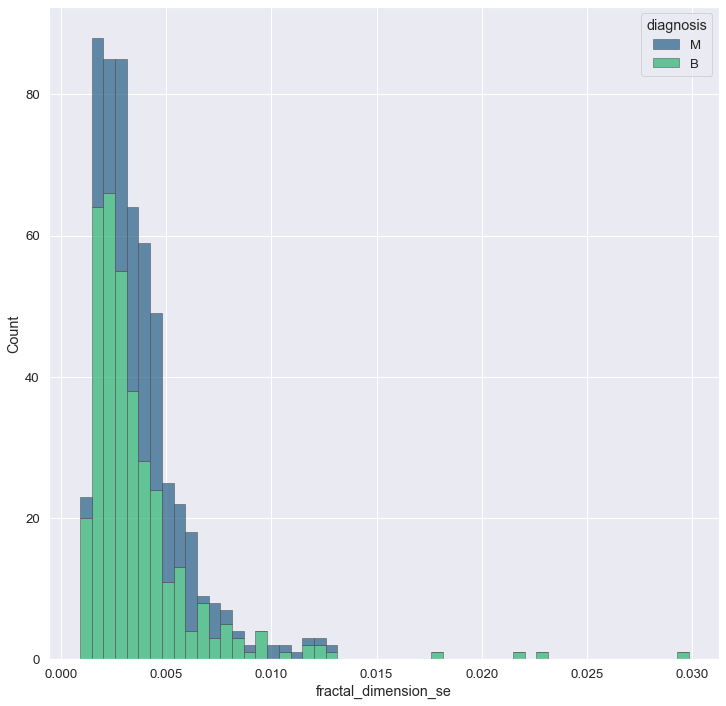

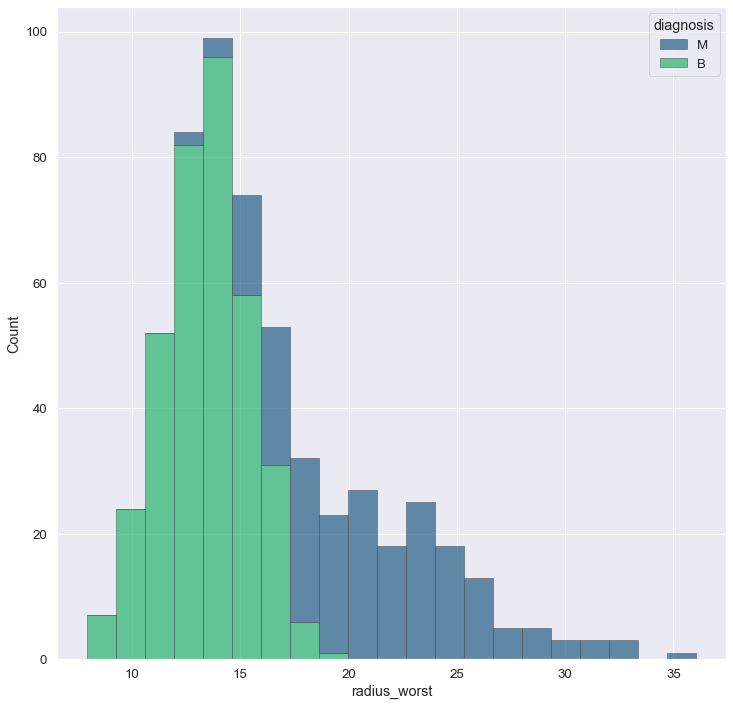

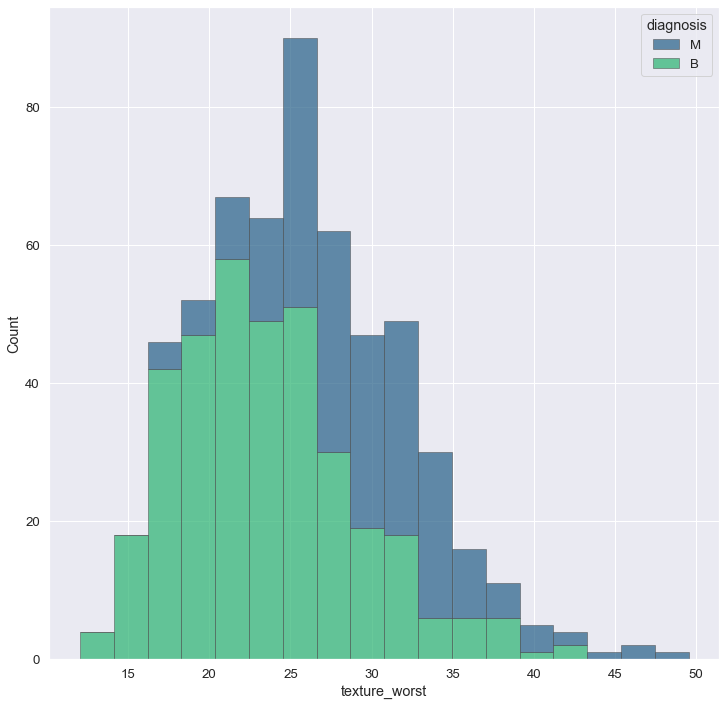

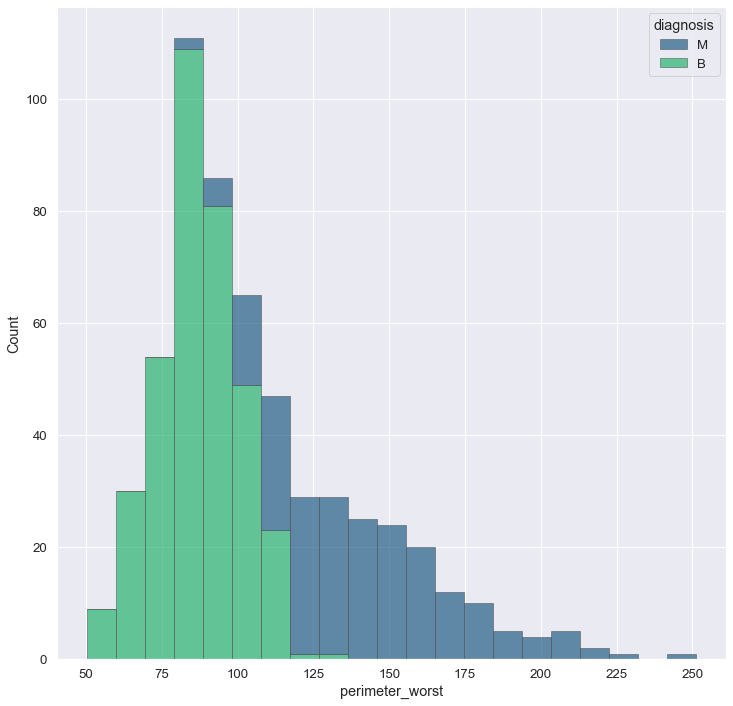

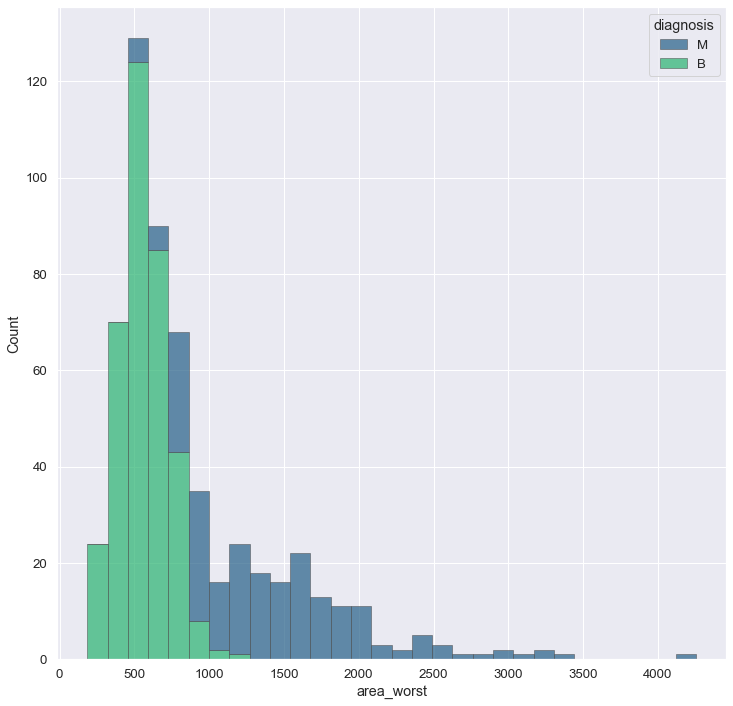

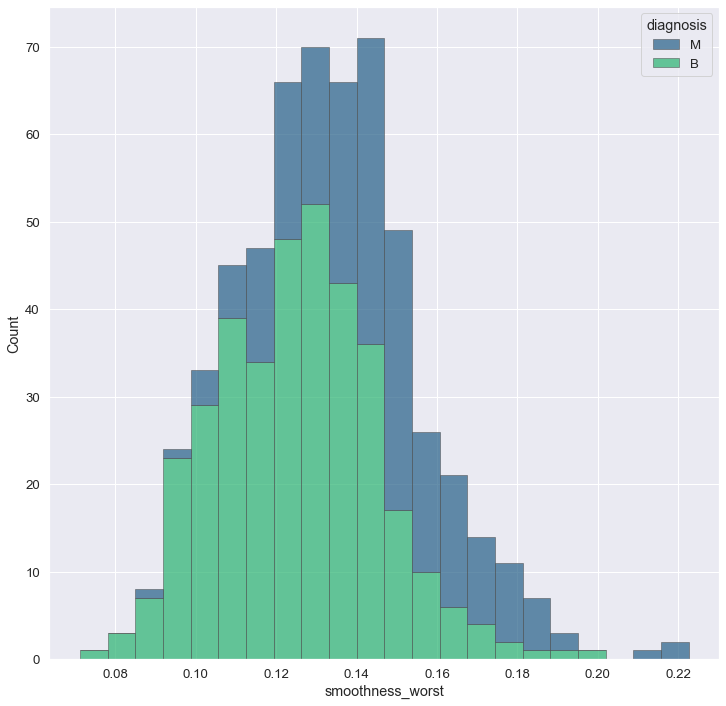

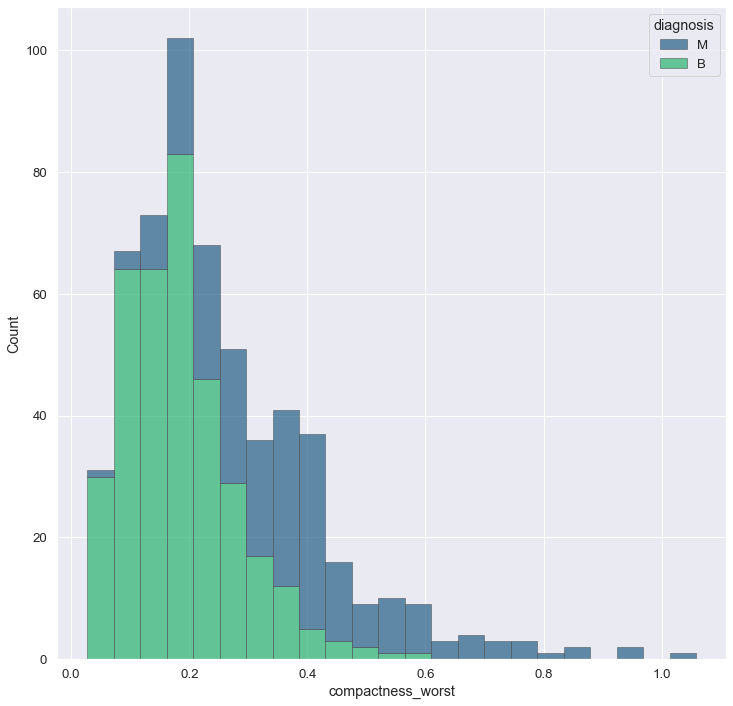

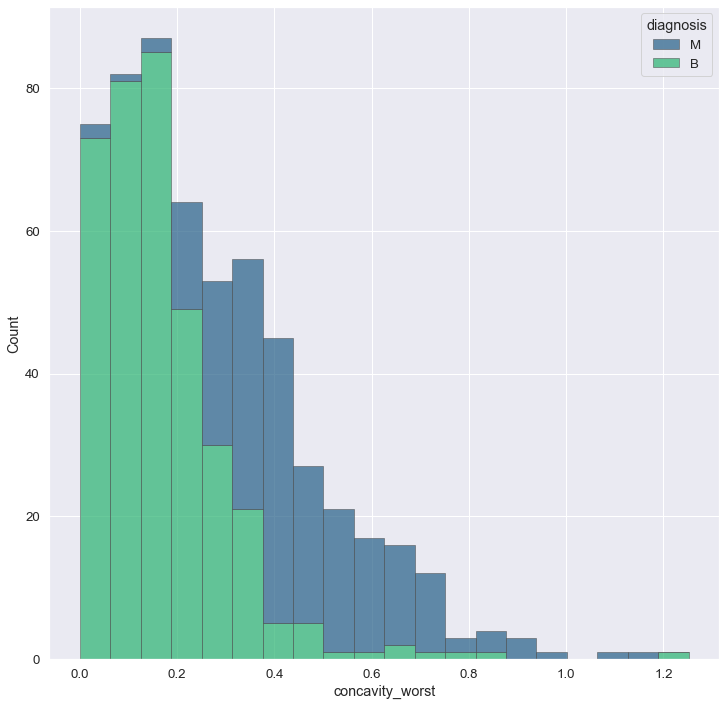

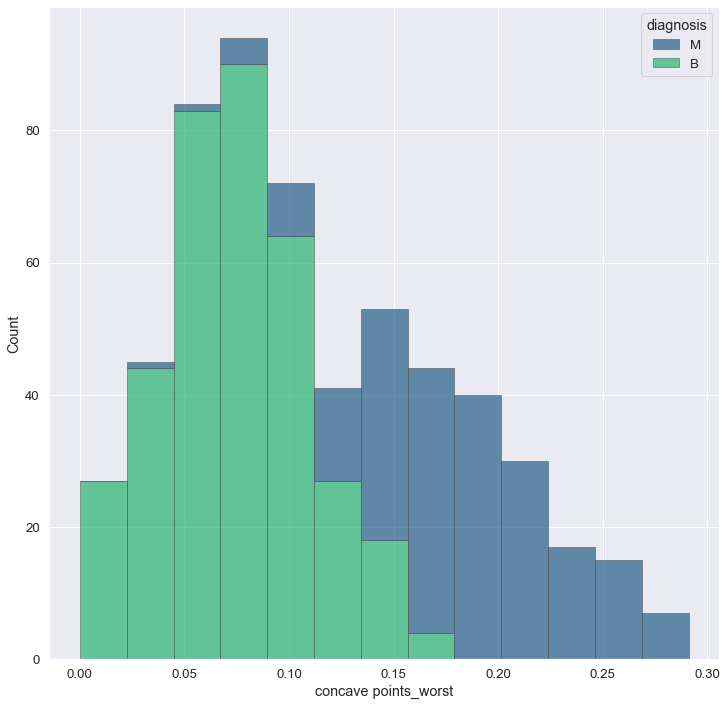

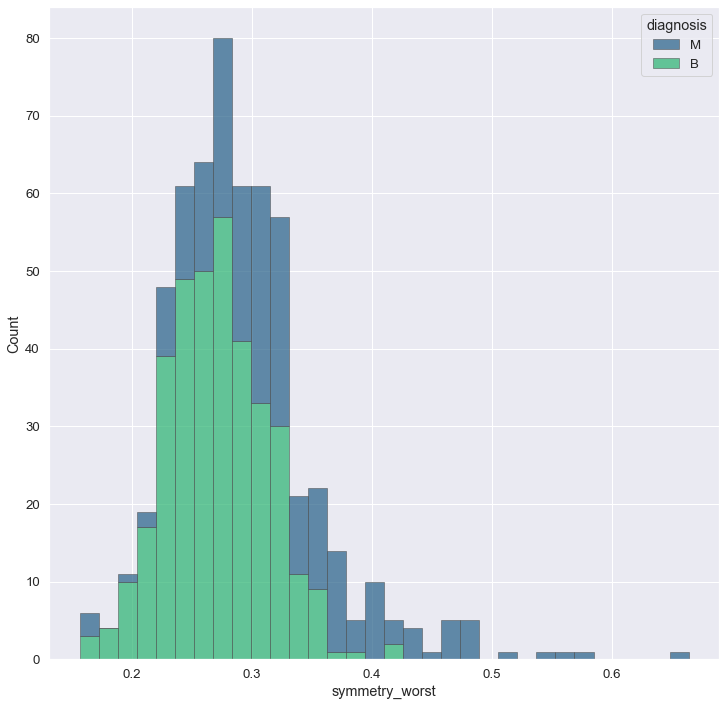

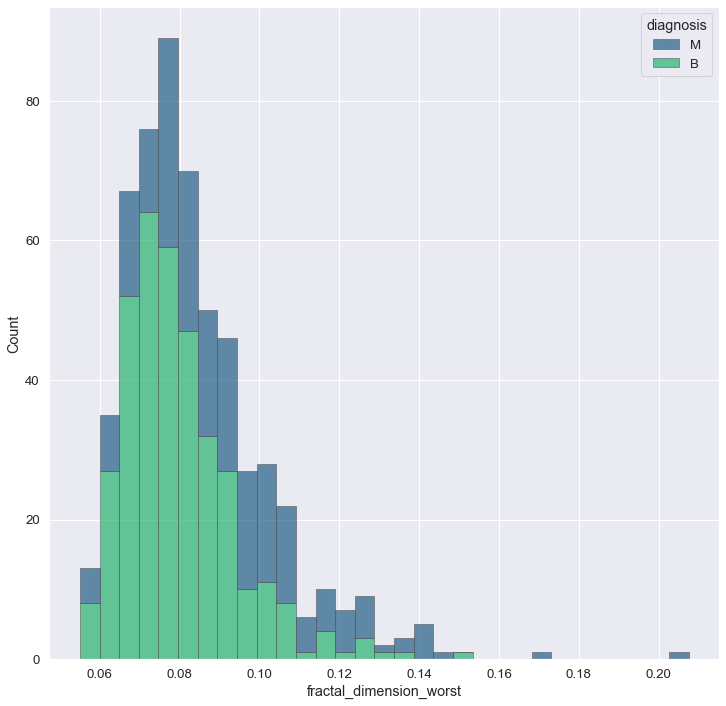

In [13]:
list2 = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
         "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", 
        "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", 
        "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst","smoothness_worst", 
        "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

for y in list2:
    sns.histplot(df,x=y, hue="diagnosis",multiple="stack",palette="viridis",edgecolor=".3",
    linewidth=.5)
    plt.show()

## Data Preprocessing for the predictor variable (diagnosis) 

In [14]:
le = LabelEncoder()

In [15]:
diagnosis_le = LabelEncoder()

In [16]:
df["diagnosis"] = diagnosis_le.fit_transform(df["diagnosis"])

In [17]:
df["diagnosis"].value_counts() 
# so it means I have imbalanced data 

0    357
1    212
Name: diagnosis, dtype: int64

In [18]:
x = df.drop(["diagnosis"], axis = 1) 
y = df["diagnosis"]

In [19]:
all_features = x.columns
all_features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
selector = SelectKBest(k=15, score_func=f_classif)
# in this part, I have chosen the f_classif since I am examinig relation ship between anova and categorical variable 
# which is either M malignant (bad cancer) or begin (good cancer)

In [21]:
selector.fit(x,y)

SelectKBest(k=15)

In [22]:
selector.scores_

array([6.46981021e+02, 1.18096059e+02, 6.97235272e+02, 5.73060747e+02,
       8.36511234e+01, 3.13233079e+02, 5.33793126e+02, 8.61676020e+02,
       6.95274435e+01, 9.34592949e-02, 2.68840327e+02, 3.90947023e-02,
       2.53897392e+02, 2.43651586e+02, 2.55796780e+00, 5.32473391e+01,
       3.90144816e+01, 1.13262760e+02, 2.41174067e-02, 3.46827476e+00,
       8.60781707e+02, 1.49596905e+02, 8.97944219e+02, 6.61600206e+02,
       1.22472880e+02, 3.04341063e+02, 4.36691939e+02, 9.64385393e+02,
       1.18860232e+02, 6.64439606e+01])

In [23]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([ 0,  2,  3,  5,  6,  7, 10, 12, 13, 20, 22, 23, 25, 26, 27])

In [24]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

In [25]:
x = x[selected_features]


## Feature Scailing 

In [26]:
scaler = RobustScaler()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [28]:
print(x_train.shape, y_train.shape)

(455, 15) (455,)


In [29]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [30]:
print(x_train.shape, y_train.shape)

(455, 15) (455,)


 ## Applying the SMOTE 

In [31]:
sm = SMOTE(random_state=27)
x_train2, y_train2 = sm.fit_sample(x_train, y_train)

In [32]:
print(x_train2.shape, y_train2.shape)

(574, 15) (574,)


## Identfying the outliers 

In [33]:
from sklearn.ensemble import IsolationForest

In [34]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(x_train2)

In [35]:
mask = yhat != -1
x_train3, y_train3 = x_train2[mask, :], y_train2[mask]

In [36]:
print(x_train3.shape, y_train3.shape)

(516, 15) (516,)


## Model Selection 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [38]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train3 , y_train3)
accuracies = cross_val_score(estimator = model_logistic, X = x_train3, y = y_train3, cv = 5,verbose = 1)
y_pred = model_logistic.predict(x_test)
print('')
print('####### Logistic Regression #######')
print('Score : %.4f' % model_logistic.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred)
print("The Accuracy Score is", accuracy_score(y_test,y_pred))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred))


####### Logistic Regression #######
Score : 0.9737
[0.92307692 0.95145631 0.94174757 0.95145631 0.97087379]

MSE    : 0.03 
MAE    : 0.03 
RMSE   : 0.16 
R2     : 0.89 
[[70  0]
 [ 3 41]]

-----------------------------------------

The Accuracy Score is 0.9736842105263158

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        70
           1       1.00      0.93      0.96        44

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [39]:
model_SVC = SVC()
model_SVC.fit(x_train3 , y_train3)
accuracies = cross_val_score(estimator = model_SVC, X = x_train3, y = y_train3, cv = 5,verbose = 1)
y_pred = model_SVC.predict(x_test)
print('')
print('####### Support Vector Machine #######')
print('Score : %.4f' % model_SVC.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred)
print("The Accuracy Score is", accuracy_score(y_test,y_pred))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Support Vector Machine #######
Score : 0.9737
[0.91346154 0.95145631 0.9223301  0.95145631 0.97087379]

MSE    : 0.03 
MAE    : 0.03 
RMSE   : 0.16 
R2     : 0.89 
[[70  0]
 [ 3 41]]

-----------------------------------------

The Accuracy Score is 0.9736842105263158

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        70
           1       1.00      0.93      0.96        44

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [40]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train3 , y_train3)
accuracies = cross_val_score(estimator = model_RF, X = x_train3, y = y_train3, cv = 5,verbose = 1)
y_pred = model_RF.predict(x_test)
print('')
print('####### Random Forest Classifier  #######')
print('Score : %.4f' % model_RF.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred)
print("The Accuracy Score is", accuracy_score(y_test,y_pred))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Random Forest Classifier  #######
Score : 0.9737
[0.93269231 0.93203883 0.95145631 0.98058252 0.98058252]

MSE    : 0.03 
MAE    : 0.03 
RMSE   : 0.16 
R2     : 0.89 
[[70  0]
 [ 3 41]]

-----------------------------------------

The Accuracy Score is 0.9736842105263158

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        70
           1       1.00      0.93      0.96        44

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


## Tunning the paramters for SVM and RandomForestClassifier using GridSearchCV 

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
params = [
        {'C':[1, 10, 100], 'kernel':['linear', 'sigmoid', 'poly']},
        {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]}
         ]

grid_search = GridSearchCV(estimator=model_SVC,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10)
grid_search.fit(x_train3, y_train3)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100],
                          'kernel': ['linear', 'sigmoid', 'poly']},
                         {'C': [1, 10, 100],
                          'gamma': [0.5, 0.6, 0.7, 0.1, 0.01, 0.01],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [43]:
grid_search.best_score_

0.9653092006033182

In [44]:
grid_search.best_params_

{'C': 100, 'kernel': 'linear'}

In [45]:
grid_search.best_estimator_

SVC(C=100, kernel='linear')

In [46]:

params = [
        {'criterion':['gini', 'entropy'], 'n_estimators':[20, 50, 100, 150, 200, 500]}
         ]

grid_search = GridSearchCV(estimator=model_RF,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)
grid_search.fit(x_train3, y_train3)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   21.2s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'n_estimators': [20, 50, 100, 150, 200, 500]}],
             scoring='accuracy', verbose=1)

In [47]:
grid_search.best_score_

0.957579185520362

In [48]:
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 500}

In [49]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=500)

## Fitting every model paramters for Support Vector Machine and Random Forest Classifier in accordance with GridSearchCV

In [50]:
model_SVC = SVC(C = 100, kernel='linear')
SVC()
model_SVC.fit(x_train3 , y_train3)
accuracies = cross_val_score(estimator = model_SVC, X = x_train3, y = y_train3, cv = 5,verbose = 1)
y_pred = model_SVC.predict(x_test)
print('')
print('####### Support Vector Machine #######')
print('Score : %.4f' % model_SVC.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred)
print("The Accuracy Score is", accuracy_score(y_test,y_pred))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred))


####### Support Vector Machine #######
Score : 0.9386
[0.95192308 0.94174757 0.94174757 0.98058252 1.        ]

MSE    : 0.06 
MAE    : 0.06 
RMSE   : 0.25 
R2     : 0.74 
[[68  2]
 [ 5 39]]

-----------------------------------------

The Accuracy Score is 0.9385964912280702

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        70
           1       0.95      0.89      0.92        44

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [51]:
model_RF = RandomForestClassifier(criterion='entropy', n_estimators=150)
model_RF.fit(x_train3 , y_train3)
accuracies = cross_val_score(estimator = model_RF, X = x_train3, y = y_train3, cv = 5,verbose = 1)
y_pred = model_RF.predict(x_test)
print('')
print('####### Random Forest Classifier  #######')
print('Score : %.4f' % model_RF.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred)
print("The Accuracy Score is", accuracy_score(y_test,y_pred))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Random Forest Classifier  #######
Score : 0.9649
[0.93269231 0.95145631 0.94174757 0.98058252 0.98058252]

MSE    : 0.04 
MAE    : 0.04 
RMSE   : 0.19 
R2     : 0.85 
[[69  1]
 [ 3 41]]

-----------------------------------------

The Accuracy Score is 0.9649122807017544

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.98      0.93      0.95        44

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
params = [
        {'C':[1, 10, 100], 'kernel':['linear', 'sigmoid', 'poly']},
        {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]}
         ]

grid_search = RandomizedSearchCV(estimator=model_SVC,
                           param_distributions=params,
                           scoring='accuracy',
                           cv=10)
grid_search.fit(x_train3, y_train3)

RandomizedSearchCV(cv=10, estimator=SVC(C=100, kernel='linear'),
                   param_distributions=[{'C': [1, 10, 100],
                                         'kernel': ['linear', 'sigmoid',
                                                    'poly']},
                                        {'C': [1, 10, 100],
                                         'gamma': [0.5, 0.6, 0.7, 0.1, 0.01,
                                                   0.01],
                                         'kernel': ['rbf']}],
                   scoring='accuracy')

In [56]:
grid_search.best_score_

0.9633861236802413

In [57]:
grid_search.best_params_

{'kernel': 'linear', 'C': 100}

In [58]:
grid_search.best_estimator_

SVC(C=100, kernel='linear')

## It seems that Gridsearch and RadomizedSearch suggest using linear kernel and C = 100 

In [60]:

params = [
        {'criterion':['gini', 'entropy'], 'n_estimators':[20, 50, 100, 150, 200, 500]}
         ]

grid_search = RandomizedSearchCV(estimator=model_RF,
                           param_distributions=params,
                           scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)
grid_search.fit(x_train3, y_train3)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.2s finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=150),
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'n_estimators': [20, 50, 100, 150, 200,
                                                          500]}],
                   scoring='accuracy', verbose=1)

In [61]:
grid_search.best_score_

0.9575414781297134

In [62]:
grid_search.best_params_

{'n_estimators': 50, 'criterion': 'entropy'}

In [63]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [65]:
model_RF = RandomForestClassifier(criterion='entropy', n_estimators=50)
model_RF.fit(x_train3 , y_train3)
accuracies = cross_val_score(estimator = model_RF, X = x_train3, y = y_train3, cv = 5,verbose = 1)
y_pred = model_RF.predict(x_test)
print('')
print('####### Random Forest Classifier  #######')
print('Score : %.4f' % model_RF.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred)
print("The Accuracy Score is", accuracy_score(y_test,y_pred))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Random Forest Classifier  #######
Score : 0.9825
[0.94230769 0.9223301  0.95145631 0.98058252 0.98058252]

MSE    : 0.02 
MAE    : 0.02 
RMSE   : 0.13 
R2     : 0.93 
[[70  0]
 [ 2 42]]

-----------------------------------------

The Accuracy Score is 0.9824561403508771

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.95      0.98        44

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


## Finally, the most 2 appropiate models to use are the Support Vector machine and the Random forest classifier with parameters criterion = entropy and the n_estimators = 50 to have in total an accuracy of 98.25 % . Therefore, the Random Forest and Support Vector Machine will only have 2 patients classified not having malignant while they have malignant cancer. 